### Libraries

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from __future__ import division
import os
import sys
from sklearn.metrics import precision_score, recall_score
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import arviz
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline
%precision 4
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler

np.random.seed(1234)
import pymc3 as pm
import scipy.stats as stats
import theano.tensor as tt
import logging
_logger = logging.getLogger("theano.gof.compilelock")
_logger.setLevel(logging.ERROR)
import pandas as pd
import imblearn
import numpy as np
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
#import scikitplot as skplt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Lasso
from sklearn import linear_model
from tqdm.notebook import tqdm, trange
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
import patsy
from theano import shared

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML2 Project/preop_.csv', low_memory = False)

#df

In [ ]:
scaler = StandardScaler()
scaler.fit(df.iloc[:,:df.shape[1]-1])
df_s = scaler.transform(df.iloc[:,:df.shape[1]-1])
df_s = pd.DataFrame(df_s)

In [ ]:
df_s['target'] = df['in_hospital_mortality']

In [ ]:
df_s.head()

0         1         2         3         4         5         6  \
0 -0.466634  0.683598 -0.137268 -0.999006 -0.591736  1.007126 -1.097226   
1 -0.466634  1.953430  0.892389  0.155933 -0.591736  1.007126  1.589120   
2 -0.466634 -0.586234 -0.652097 -1.385427 -0.591736 -0.992925 -1.097226   
3 -0.466634 -1.509748 -0.137268 -0.536147 -0.591736 -0.992925 -1.097226   
4 -0.466634 -1.509748  0.892389 -0.369126 -0.591736 -0.992925  0.245947   

          7         8         9  ...        46        47        48        49  \
0  0.928919 -0.800788 -0.266309  ... -0.127794  0.328398 -0.479943  0.186364   
1 -1.995284  1.235229 -0.203659  ... -0.127794  0.328398  2.083583 -0.708264   
2  0.969533 -0.800788 -0.814503  ... -0.127794 -3.045087 -0.479943 -0.708264   
3 -1.122085 -0.800788 -0.454261  ... -0.127794  0.328398 -0.479943  1.080992   
4 -0.817480 -0.800788 -0.234984  ... -0.127794  0.328398 -0.479943  0.186364   

         50        51        52        53        54  target  
0 -0.076328 -0.277345  0.423398  1.558388  0.887151       0  
1 -0.076328 -0.277345  1.761864  1.558388  0.887151       0  
2 -0.076328 -0.277345  0.423398 -0.640529 -0.810394       0  
3 -0.076328 -0.277345 -0.915069  1.558388 -0.810394       0  
4 -0.076328 -0.277345  0.423398  1.558388  0.887151       0  

[5 rows x 56 columns]

1.7100

In [ ]:
df['patient_age'] = df['patient_age'].apply(lambda x:x/100)
df['BMI'] = df['BMI'].apply(lambda x:x/100)
df['last_hematocrit'] = df['last_hematocrit'].apply(lambda x:x/100)
#df['BPsystolic'] = df['BPsystolic'].apply(lambda X:x/1000)
df['BPsystolic'] = df['BPsystolic'].apply(lambda x:x/1000)

In [ ]:
df.head()

gender_id  patient_age  Admission_to_surgery       BMI  Active_tobacco_use  \
0          0         0.64                     2  0.224766                   0   
1          0         0.75                     4  0.275000                   0   
2          0         0.53                     1  0.207958                   0   
3          0         0.45                     2  0.244898                   0   
4          0         0.45                     4  0.252163                   0   

   f_history_cad  diabetes  last_hematocrit  Dyslipidemia  \
0              1         0            0.451             0   
1              1         2            0.307             1   
2              0         0            0.453             0   
3              0         0            0.350             0   
4              0         1            0.365             0   

   last_cretenine_preop  ...  bronchodilators  Coronaries_diseased  \
0                  0.97  ...                0                    1   
1                  1.01  ...                0                    1   
2                  0.62  ...                0                    0   
3                  0.85  ...                0                    1   
4                  0.99  ...                0                    1   

   left_main_disease  ejection_fraction  pulmonary_artery_hypertension  \
0                  0               0.45                              0   
1                  1               0.35                              0   
2                  0               0.35                              0   
3                  0               0.55                              0   
4                  0               0.45                              0   

   Aortic_regurgitation  Mitral_regurgitation  Tricuspid_regurgitation  \
0                     0                     1                        1   
1                     0                     2                        1   
2                     0                     1                        0   
3                     0                     0                        1   
4                     0                     1                        1   

   CABG_status  in_hospital_mortality  
0            2                      0  
1            2                      0  
2            1                      0  
3            1                      0  
4            2                      0  

[5 rows x 56 columns]

In [ ]:
# drop 1
df0 = df.drop(columns = ['TempSNO', 'city_id', 'Ethicity_language','specify_other', 'mortality_date'])
df0 = df0.replace(r'^\s*$', np.nan, regex=True)
df0 = df0.drop(columns = ['date_of_admission', 'date_of_surgery','date_of_discharge','or_entry_date', 'or_entry_time','or_exit_date', 'or_exit_time', 'intubation_time', 'extubation_time','skin_incision_start_date','skin_incision_start_time','skin_incision_closure_date','skin_incision_closure_time' ])

In [ ]:
# BMI
df0['BMI'] = pd.to_numeric(df0['BMI'],errors = 'coerce')
for i in trange(df0.shape[0]):
    df0['BMI'][i] = (df0['weight'][i])/(df0['height'][i]/100)**2

  0%|          | 0/5363 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# additional_icu_hours ref: readmission
df0['additional_icu_hours']= pd.to_numeric(df0['additional_icu_hours'],errors = 'coerce')
df0['additional_icu_hours'] = df0['additional_icu_hours'].fillna(0)
df0['additional_icu_hours'] = df0['additional_icu_hours'].apply(lambda x:x/24)

# additional_hours_ventilated ref: reintubated
df0['additional_hours_ventilated']= pd.to_numeric(df0['additional_hours_ventilated'],errors = 'coerce')
df0['additional_hours_ventilated'] = df0['additional_hours_ventilated'].fillna(0)
df0['additional_hours_ventilated'] = df0['additional_hours_ventilated'].apply(lambda x:x/24)


# red_blood_cells_units_A ref: intaop_blood_products
df0['red_blood_cell_units_A'] = pd.to_numeric(df0['red_blood_cell_units_A'],errors = 'coerce')
df0['red_blood_cell_units_A'] = df0['red_blood_cell_units_A'].fillna(0)

# fresh_frozen_plasma_units_A ref: intaop_blood_products
df0['fresh_frozen_plasma_units_A'] = pd.to_numeric(df0['fresh_frozen_plasma_units_A'],errors = 'coerce')
df0['fresh_frozen_plasma_units_A'] = df0['fresh_frozen_plasma_units_A'].fillna(0)

# cryoprecipitate_units_A ref: intaop_blood_products
df0['cryoprecipitate_units_A'] = pd.to_numeric(df0['cryoprecipitate_units_A'],errors = 'coerce')
df0['cryoprecipitate_units_A'] = df0['cryoprecipitate_units_A'].fillna(0)

# platelet_units_A ref: intaop_blood_products
df0['platelet_units_A'] = pd.to_numeric(df0['platelet_units_A'],errors = 'coerce')
df0['platelet_units_A'] = df0['platelet_units_A'].fillna(0)

# no_of_ima_distal ref: IMA
df0['no_of_ima_distal'] = pd.to_numeric(df0['no_of_ima_distal'],errors = 'coerce')
df0['no_of_ima_distal'] = df0['no_of_ima_distal'].fillna(0)

# DirectVision ref: IMA
df0['DirectVision'] = pd.to_numeric(df0['DirectVision'],errors = 'coerce')
df0['DirectVision'] = df0['DirectVision'].fillna(0)

# distal_anastomoses: Radial Conduit
df0['distal_anastomoses'] = pd.to_numeric(df0['distal_anastomoses'],errors = 'coerce')
df0['distal_anastomoses'] = df0['distal_anastomoses'].fillna(0)

# IABP_indication ref: IABP
df0['IABP_indication'] = pd.to_numeric(df0['IABP_indication'],errors = 'coerce')
df0['IABP_indication'] = df0['IABP_indication'].fillna(0)

# CPB_utilization_plan
df0['CPB_utilization_plan'] = pd.to_numeric(df0['CPB_utilization_plan'],errors = 'coerce')
df0['CPB_utilization_plan'] = df0['CPB_utilization_plan'].fillna(0)

# FemoralArteryandFemVein
df0['FemoralArteryandFemVein'] = pd.to_numeric(df0['FemoralArteryandFemVein'],errors = 'coerce')
df0['FemoralArteryandFemVein'] = df0['FemoralArteryandFemVein'].fillna(0)

# AortaandAtrialCaval
df0['AortaandAtrialCaval'] = pd.to_numeric(df0['AortaandAtrialCaval'],errors = 'coerce')
df0['AortaandAtrialCaval'] = df0['AortaandAtrialCaval'].fillna(0)

# cannulation_method_other
df0['cannulation_method_other'] = pd.to_numeric(df0['cannulation_method_other'],errors = 'coerce')
df0['cannulation_method_other'] = df0['cannulation_method_other'].fillna(0)

# None_F
df0['None_F'] = pd.to_numeric(df0['None_F'],errors = 'coerce')
df0['None_F'] = df0['None_F'].fillna(0)

# AorticCrossClamp
df0['AorticCrossClamp'] = pd.to_numeric(df0['AorticCrossClamp'],errors = 'coerce')
df0['AorticCrossClamp'] = df0['AorticCrossClamp'].fillna(0)

# BalloonOcclusion
df0['BalloonOcclusion'] = pd.to_numeric(df0['BalloonOcclusion'],errors = 'coerce')
df0['BalloonOcclusion'] = df0['BalloonOcclusion']

# PartialCrossClamp
df0['PartialCrossClamp'] = pd.to_numeric(df0['PartialCrossClamp'],errors = 'coerce')
df0['PartialCrossClamp'] = df0['PartialCrossClamp'].fillna(0)

# cross_clamp_time_min
df0['cross_clamp_time_min'] = pd.to_numeric(df0['cross_clamp_time_min'],errors = 'coerce')
df0['cross_clamp_time_min'] = df0['cross_clamp_time_min'].fillna(0)

# perfusion_time_min
df0['perfusion_time_min'] = pd.to_numeric(df0['perfusion_time_min'],errors = 'coerce')
df0['perfusion_time_min'] = df0['perfusion_time_min'].fillna(0)

# post_op_creatinine
df0['post_op_creatinine']= pd.to_numeric(df0['post_op_creatinine'],errors = 'coerce')
df0['post_op_creatinine'] = df0['post_op_creatinine'].interpolate(method = 'polynomial', order = 2)

# drainage_at_12_hours
df0['drainage_at_12_hours']= pd.to_numeric(df0['drainage_at_12_hours'],errors = 'coerce')
df0['drainage_at_12_hours'] = df0['drainage_at_12_hours'].interpolate(method = 'polynomial', order = 2)
df0['drainage_at_12_hours'] = df0['drainage_at_12_hours'].apply(lambda x:x/1000)

# drainage_at_24_hours
df0['drainage_at_24_hours']= pd.to_numeric(df0['drainage_at_24_hours'],errors = 'coerce')
df0['drainage_at_24_hours'] = df0['drainage_at_24_hours'].interpolate(method = 'polynomial', order = 2)
df0['drainage_at_24_hours'] = df0['drainage_at_24_hours'].apply(lambda x:x/1000)

df0.loc[df0['icu_visit'] == 0, 'initial_icu_hours'] = 0
df0.loc[df0['icu_visit'] == 0, 'initial_hours_ventilated'] = 0
df0.loc[df0['icu_visit'] == 0, 'initial_icu_stay'] = 0

# initial_hours_ventilated
df0['initial_hours_ventilated']= pd.to_numeric(df0['initial_hours_ventilated'],errors = 'coerce')
df0['initial_hours_ventilated'] = df0['initial_hours_ventilated'].interpolate(method = 'polynomial', order = 2)
df0['initial_hours_ventilated'] = df0['initial_hours_ventilated'].apply(lambda x:x/24)

# initial_icu_hours
df0['initial_icu_hours']= pd.to_numeric(df0['initial_icu_hours'],errors = 'coerce')
df0['initial_icu_hours'] = df0['initial_icu_hours'].interpolate(method = 'polynomial', order = 2)


# initial_icu_stay
df0['initial_icu_stay']= pd.to_numeric(df0['initial_icu_stay'],errors = 'coerce')
df0['initial_icu_stay'] = df0['initial_icu_stay'].interpolate(method = 'polynomial', order = 2)
df0['initial_icu_stay'] = df0['initial_icu_stay'].apply(lambda x:x/24)

# BPsystolic
df0['BPsystolic'] = pd.to_numeric(df0['BPsystolic'],errors = 'coerce')
m1 = df0.loc[df0['hypertension'] == 1, 'BPsystolic'].mean()
m2 = df0.loc[df0['hypertension'] == 0, 'BPsystolic'].mean()
df0.loc[df0['hypertension'] == 1, 'BPsystolic'] = df0.loc[df0['hypertension'] == 1, 'BPsystolic'].fillna(m1)#isnull().sum()
df0.loc[df0['hypertension'] == 0, 'BPsystolic'] = df0.loc[df0['hypertension'] == 0, 'BPsystolic'].fillna(m2)#isnull().sum()

# BalloonOcclusion
df0['BalloonOcclusion'] = pd.to_numeric(df0['BalloonOcclusion'],errors = 'coerce')
df0['BalloonOcclusion'] = df0['BalloonOcclusion'].fillna(0)

# LM_specify, weight, height, initial_icu_hours
df0 = df0.drop(columns = ['LM_specify','weight','height','initial_icu_hours'])

# inubation and extubation
df0['intubation_date'] = pd.to_datetime(df0.intubation_date)
df0['extubation_date'] = pd.to_datetime(df0.extubation_date)
df0['intubation_to_extubation'] = (df0['extubation_date'] - df0['intubation_date']).dt.days

# cross_clamp_time_min
df0['cross_clamp_time_min']= pd.to_numeric(df0['cross_clamp_time_min'],errors = 'coerce')
df0['cross_clamp_time_min'] = df0['cross_clamp_time_min'].apply(lambda x:x/1440)

# perfusion_time_min
df0['perfusion_time_min']= pd.to_numeric(df0['perfusion_time_min'],errors = 'coerce')
df0['perfusion_time_min'] = df0['perfusion_time_min'].apply(lambda x:x/1440)

# ejection_fraction
df0['ejection_fraction']= pd.to_numeric(df0['ejection_fraction'],errors = 'coerce')
df0['ejection_fraction'] = df0['ejection_fraction'].apply(lambda x:x/100)

# gender_id
df0['gender_id'] = df0['gender_id'].apply(lambda x: x-1) # from male = 1 & female = 2, to , male = 0 & female = 1

# Cardiac_Presentation_on_Admission
df0['Cardiac_Presentation_on_Admission'] = df0['Cardiac_Presentation_on_Admission'].apply(lambda x: x-1) # 

# drop intubation and extubation
df0 = df0.drop(columns = ['intubation_date','extubation_date'])

# drop na
df0 = df0.dropna()
i_2_e = df0.pop('intubation_to_extubation')
df0.insert(0,'intubation_to_extubation', i_2_e)
df0 = df0.apply(pd.to_numeric)
df0 = df0.loc[df0['drainage_at_12_hours'] >=0 ]
df0 = df0.loc[df0['drainage_at_24_hours'] >=0 ]
df0 = df0.loc[df0['post_op_creatinine'] >=0 ]
df0 = df0.loc[df0['intubation_to_extubation'] >= 0]
df0 = df0.loc[df0['initial_hours_ventilated'] >= 0]
df0

intubation_to_extubation  ...  in_hospital_mortality
0                          1.0  ...                      0
1                          1.0  ...                      0
2                          0.0  ...                      0
4                          1.0  ...                      0
5                          1.0  ...                      0
...                        ...  ...                    ...
5347                       1.0  ...                      0
5350                       1.0  ...                      0
5355                       0.0  ...                      0
5356                       1.0  ...                      0
5361                       2.0  ...                      0

[5305 rows x 121 columns]

In [ ]:
l = [0,1,2,3,4,6,7,9,12,27,28,29,31,34,49,18,24,25,26,38,40,52,54,55]
df_f = df_s.iloc[0:,l]

In [ ]:
sts = [0,1,3,7,9,10,11,12,13,6,5,4,15,14,17,24,25,26,27,29,33,40,45,30,35,41,49,51,52,53,54,55]
df_sts = df_s.iloc[0:,sts]

In [ ]:
df_f.shape

(5352, 24)

# Baseline Model

In [ ]:
#df0 = df
df0 = df_s
#df0 = df_f
#df0 = df_sts
df0 = df0.sample(frac = 1)

data_X = df0.iloc[:,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df0.iloc[:,len(df0.columns)-1] # target variable only

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=44)

#xgb = SelectFromModel(XGBClassifier(n_estimators = 1000), threshold=0.002 )
#xgb.fit(X_train, Y_train)
#selected_feat= len(X_train.columns[(xgb.get_support())])
#print(selected_feat)
#col_names = X_train.columns[(xgb.get_support())]
#print(col_names)

#X_train_xgb = xgb.transform(X_train)
#X_test_xgb = xgb.transform(X_test)

#X_shared = shared(X_train_xgb)
#Y_shared = shared(Y_train.values)

X_shared = shared(X_train.values)
Y_shared = shared(Y_train.values)


In [ ]:
df.columns# 0,1,2,3,4,6,7,9,12,27,28,29,31,34,49,18,24,25,26,38,40,52,54
#0,1,3,7,9,10,11,12,13,6,5,4,15,14,17,24,25,26,27,29,33,40,45,30,35,41,49,51,52,53,54

Index(['gender_id', 'patient_age', 'Admission_to_surgery', 'BMI',
       'Active_tobacco_use', 'f_history_cad', 'diabetes', 'last_hematocrit',
       'Dyslipidemia', 'last_cretenine_preop', 'dialysis', 'hypertension',
       'BPsystolic', 'Cerebovascular_disease', 'Carotid_disease',
       'chronic_lung_disease', 'FirstCVSurgery', 'previous_cv_interventions',
       'previous_coronary_bypass', 'previous_valve', 'intracardiac_device',
       'Prior_PCI', 'PCI_timing', 'myocardial_infarction', 'MI_timing',
       'congestive_heart_failure_A', 'NYHA_class',
       'Cardiac_Presentation_on_Admission', 'Angina_class',
       'cardiogenic_shock', 'resuscitation', 'arrhythmia', 'SustVTVF',
       'AFibFlutter', 'ventilator_used', 'beta_blockers_A', 'ace_inhibitors_A',
       'nitratesIV', 'anti_coagulants', 'warfarin_A', 'inotropes', 'steroids',
       'aspirin_A', 'lipid_lowering_A', 'Statin_A',
       'adp_inhibitors_within_5days', 'bronchodilators', 'Coronaries_diseased',
       'left_main

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


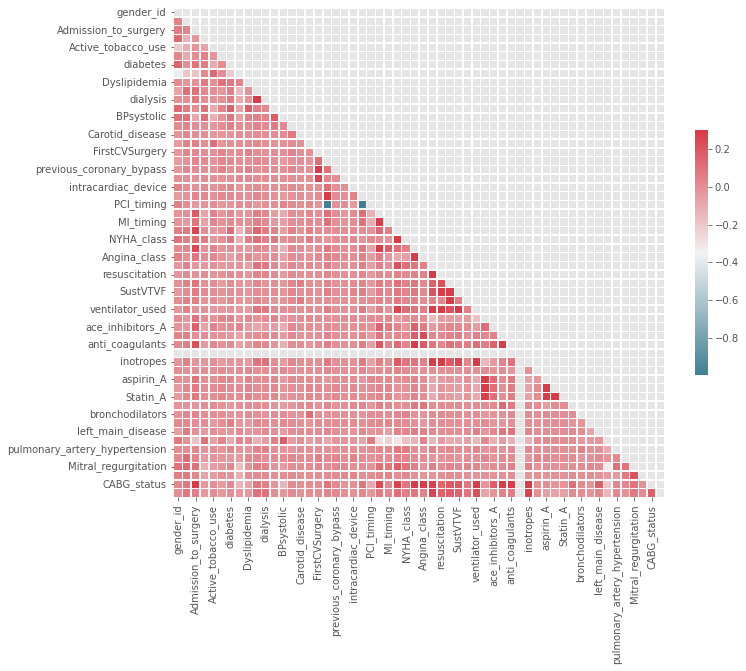

In [ ]:
# Compute the correlation matrix
corr = df0.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    ax=ax,
)

In [ ]:
corr = df0.corr()
corr

In [ ]:
stats.probplot(data, dist='poisson', sparams=(2.5,), plot=plt)

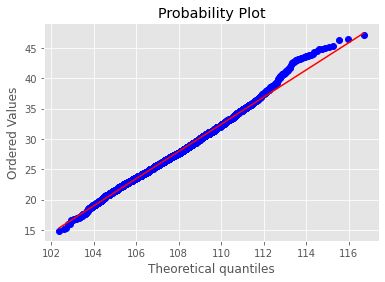

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
import scipy.stats as stats
#data=np.random.poisson(2.5, 100)
#stats.probplot(df['BPsystolic'], dist=stats.chi2,sparams = (50,1,1), plot=plt)
stats.probplot(df['BMI'], dist=stats.erlang,sparams = (15,100,0.5), plot=plt)
#stats.probplot(df['patient_age'], dist=stats.norm, plot=plt)
#stats.probplot(df['last_hematocrit'], dist=stats.chi2,sparams = (50,1,1), plot=plt)
plt.show()

# Model  (Without Feature Selection)

### Scaled

In [ ]:
#coords = {"observation": df0.index.values}
model = pm.Model()
with model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    betas = pm.Normal('beta', 0, 20, shape=(1,X_train.shape[1]))
    sigma = pm.HalfNormal('sigma', sd=100)
    #xdata = pm.Data("pred", X_train.T)
    #mu = alpha + pm.math.dot(betas , X_shared.T)
    logit_p =  pm.math.dot(X_shared, betas)
    p = pm.math.exp(logit_p) / (1 + pm.math.exp(logit_p))

    ##mu = pm.math.dot(betas, X_shared.T) + alpha
    ##logistic = pm.Deterministic('logistic',pm.math.sigmoid(mu))
    
    #f = pm.math.dot(betas,X_shared.T)
    #p = pm.Deterministic('p', 1. / (1. + pm.math.exp(f + alpha))) 
    #p = pm.Deterministic("p", pm.math.invlogit(mu))
    
    # likelihood
    #y = pm.Bernoulli("y",p=p, observed=Y_shared)
    y = pm.Bernoulli("y", logit_p = logit_p, observed=Y_shared)
    
    #likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=Y_shared)
    
    step = pm.NUTS(target_accept = 0.99)
    #trace1 = pm.sample(3000,init='ADVI+adapt_diag',return_inferencedata=True, tune = 5000)
    trace1 = pm.sample(3000,return_inferencedata=True, tune = 10000,chains = 4)
    
    #start = pm.find_MAP()
    #step = pm.NUTS(scaling=start)
    #trace = pm.sample(3000, step, progressbar=True)

    arviz.plot_trace(trace1)
    arviz.plot_posterior(trace1)
    print(pm.summary(trace1))
# Update X values and predict outcomes and probabilities
#with bglm:
 #   pm.set_data({"pred": X_test.T})
  #  posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["y"], samples=600)
  #  model_preds = posterior_predictive["y"]

#dic = pm.sampling.fast_sample_posterior_predictive(trace, var_names = ('a','b','y'), model= model)
#pred_mean = dic['y'].mean()
#with pm.Model() as model:
 #   coeff = pm.Normal('x', mu=0, sd=1)
  #  logistic = pm.math.sigmoid(coeff * x_shared)
  #  pm.Bernoulli('obs', p=logistic, observed=y_shared)
  #  trace = pm.sample()

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [sigma, beta, alpha]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49e71256d0>],
      dtype=object)

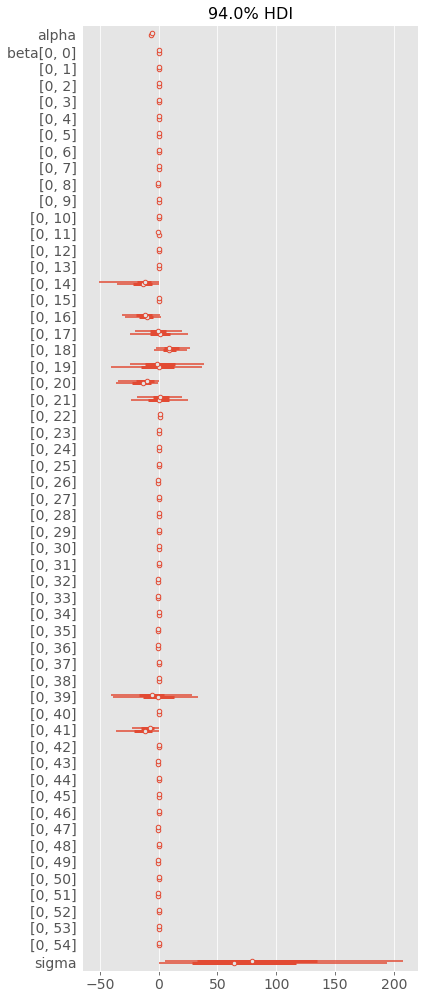

In [ ]:
arviz.plot_forest(trace1)

In [ ]:
# saving trace
trace1.to_netcdf("trace1.nc")
# loading trace
#trace1 = arviz.from_netcdf("trace1.nc")

'trace1.nc'

In [ ]:

X_shared.set_value(X_test)
Y_shared.set_value(Y_test) # dummy values

with model:
    post_pred = pm.sample_posterior_predictive(trace1, samples=X_test.shape[0])

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


In [ ]:
yp = pd.DataFrame(post_pred['y'][0].ravel().tolist())
for i in range(1,len(post_pred['y'])):
  yp.insert(loc = i,column = i, value = post_pred['y'][i].ravel().tolist() )

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
yp_= yp.mean(axis = 1)

ROC is : 0.44293136541134426


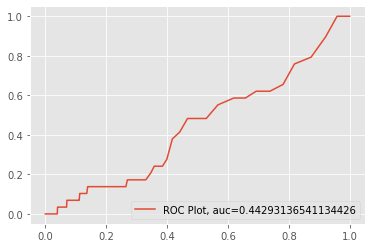

In [ ]:
y_pred = yp_
print("ROC is :",roc_auc_score(Y_test,y_pred))
fpr, tpr, _ = roc_curve(Y_test, y_pred )
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
thr = np.linspace(0,1,70)
precision = []
recall = []
roc = []
for i in thr:
  temp = y_pred >= i
  temp = temp.values.astype('int')
  precision.append(precision_score(Y_test,temp))
  recall.append(recall_score(Y_test,temp))
  roc.append(roc_auc_score(Y_test,temp))

plt.plot(thr,precision)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision VS Threshold')
plt.show()
plt.plot(thr,recall)
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall VS Threshold')
plt.show()
plt.plot(thr,roc)
plt.xlabel('Threshold')
plt.ylabel('ROC')
plt.title('ROC VS Threshold')
plt.show()

In [ ]:
ref = pd.DataFrame({'pred': y_pred.tolist(),'act':Y_test})
ref.to_csv('ref1.csv',index = False)

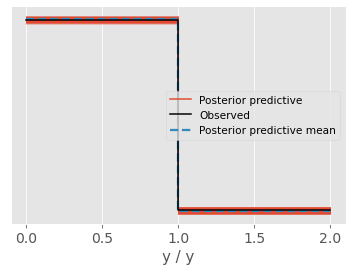

In [ ]:
# posterior check
# posterior check
with model:
    post_check = pm.sample_posterior_predictive(trace1, var_names = ['alpha', 'beta','y'])
arviz.plot_ppc(arviz.from_pymc3(posterior_predictive=post_check, model=model))


In [ ]:
trace1

### Full Scale

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 5_000 tune and 3_000 draw iterations (10_000 + 6_000 draws total) took 2885 seconds.
There were 51 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1662 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/arviz/plots/plot_utils.py:277: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (57) in plot_posterior, generating only 40 plots
  UserWarning,


               mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha        -1.337   7.323 -14.806   12.061      0.328    0.232     501.0   
beta[0, 0]    0.460   0.302  -0.101    1.017      0.010    0.007     960.0   
beta[0, 1]    0.056   0.013   0.031    0.079      0.001    0.000     583.0   
beta[0, 2]    0.083   0.046  -0.001    0.171      0.002    0.002     478.0   
beta[0, 3]   -0.002   0.026  -0.055    0.044      0.001    0.001     614.0   
beta[0, 4]    0.255   0.239  -0.204    0.695      0.007    0.005    1017.0   
beta[0, 5]   -0.061   0.215  -0.480    0.320      0.007    0.005     872.0   
beta[0, 6]    0.010   0.150  -0.277    0.291      0.005    0.004     936.0   
beta[0, 7]    0.038   0.022  -0.005    0.080      0.001    0.001     712.0   
beta[0, 8]   -0.363   0.243  -0.831    0.096      0.008    0.006     841.0   
beta[0, 9]    0.124   0.133  -0.113    0.379      0.005    0.003     781.0   
beta[0, 10]   1.124   0.744  -0.229    2.502      0.026    0.019

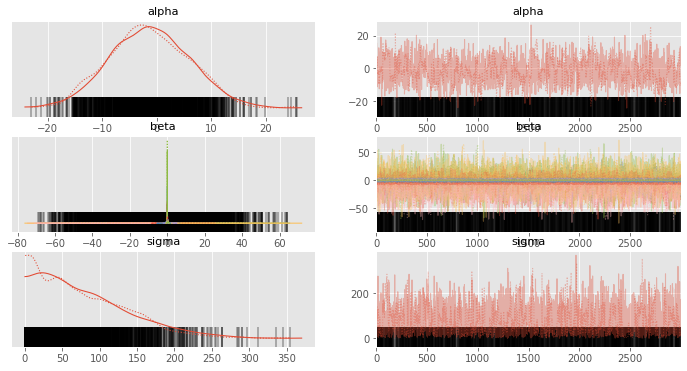

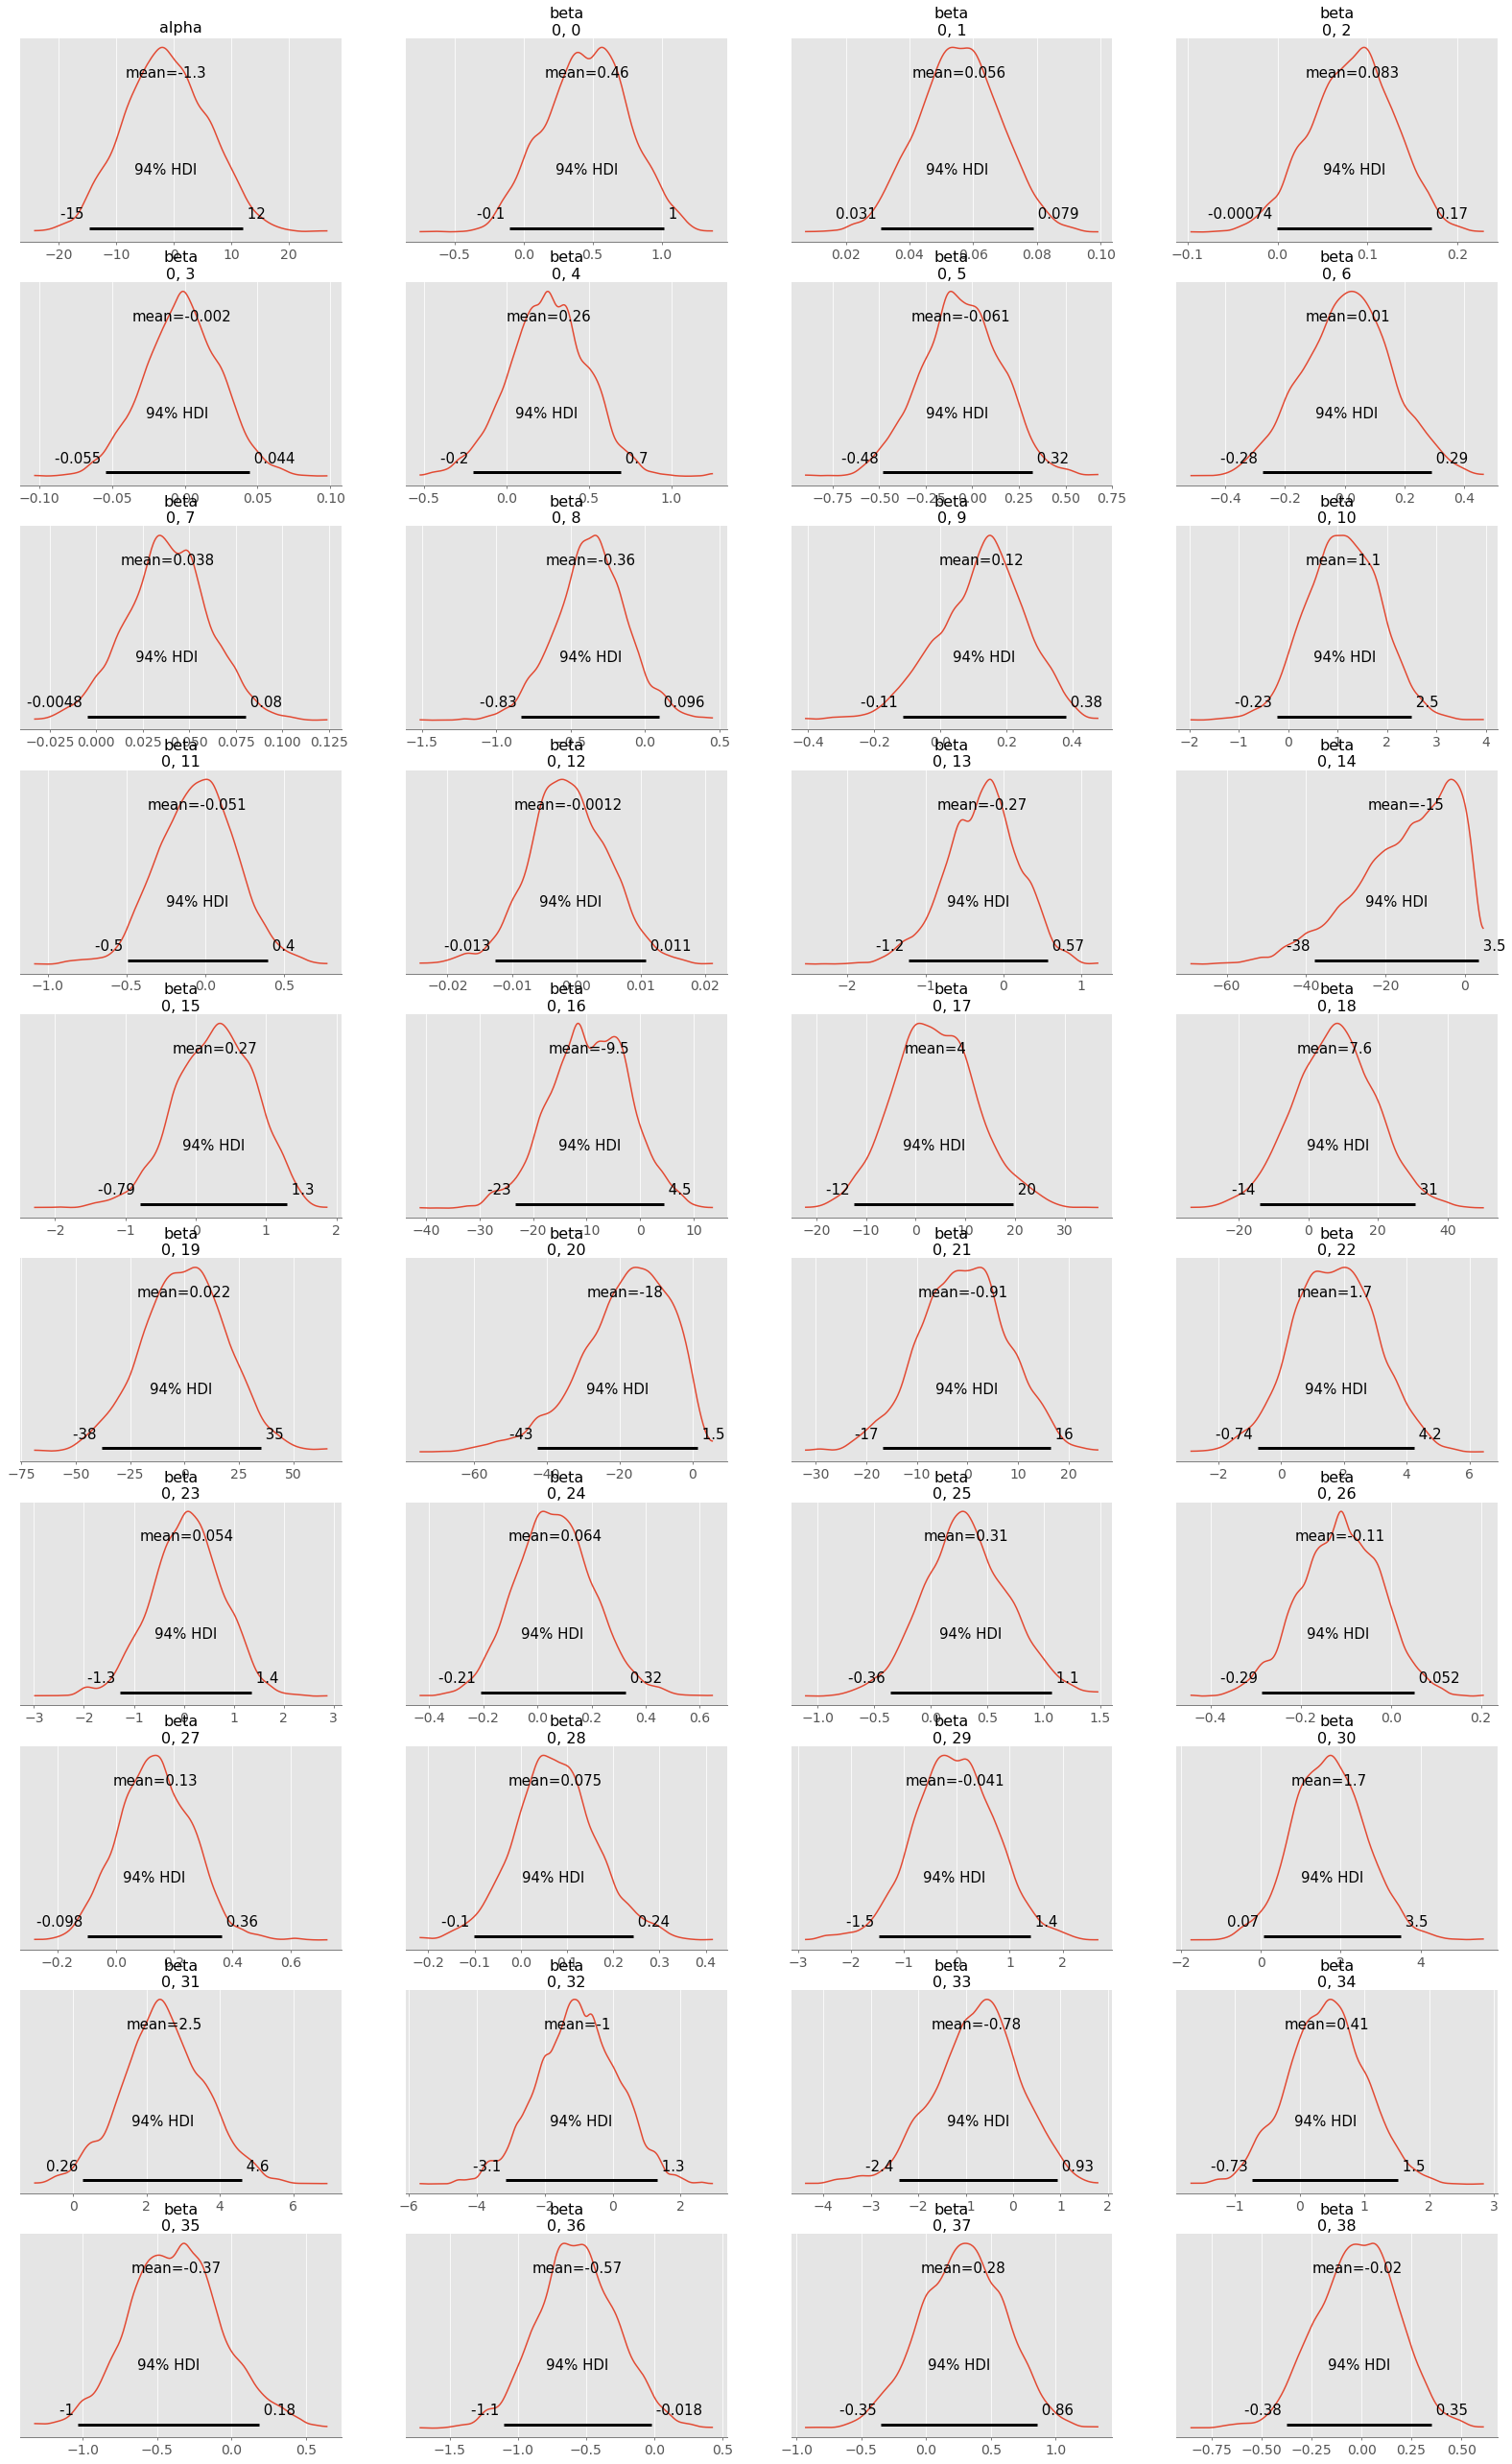

In [ ]:
#coords = {"observation": df0.index.values}
model_full_scale = pm.Model()
with model_full_scale:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    betas = pm.Normal('beta', 0, 20, shape=(1,X_train.shape[1]))
    sigma = pm.HalfNormal('sigma', sd=100)
    #xdata = pm.Data("pred", X_train.T)
    #mu = alpha + pm.math.dot(betas , X_shared.T)
    logit_p =  pm.math.dot(betas, X_shared.T) + alpha
    p = pm.Deterministic('p', pm.math.invlogit(logit_p))

    #p = pm.math.exp(logit_p) / (1 + pm.math.exp(logit_p))

    ##mu = pm.math.dot(betas, X_shared.T) + alpha
    ##logistic = pm.Deterministic('logistic',pm.math.sigmoid(mu))
    
    #f = pm.math.dot(betas,X_shared.T)
    #p = pm.Deterministic('p', 1. / (1. + pm.math.exp(f + alpha))) 
    #p = pm.Deterministic("p", pm.math.invlogit(mu))
    
    # likelihood
    #y = pm.Bernoulli("y",p=p, observed=Y_shared)
    y = pm.Bernoulli("y", logit_p = logit_p, observed=Y_shared)
    
    #likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=Y_shared)
    
    step = pm.NUTS(target_accept = 0.95)
    #trace = pm.sample(3000,init='ADVI+adapt_diag',return_inferencedata=True, tune = 5000)
    trace = pm.sample(3000,return_inferencedata=True, tune = 5000)

    #start = pm.find_MAP()
    #step = pm.NUTS(scaling=start)
    #trace = pm.sample(3000, step, progressbar=True)

    arviz.plot_trace(trace)
    arviz.plot_posterior(trace)
    print(pm.summary(trace))
# Update X values and predict outcomes and probabilities
#with bglm:
 #   pm.set_data({"pred": X_test.T})
  #  posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["y"], samples=600)
  #  model_preds = posterior_predictive["y"]

#dic = pm.sampling.fast_sample_posterior_predictive(trace, var_names = ('a','b','y'), model= model)
#pred_mean = dic['y'].mean()
#with pm.Model() as model:
 #   coeff = pm.Normal('x', mu=0, sd=1)
  #  logistic = pm.math.sigmoid(coeff * x_shared)
  #  pm.Bernoulli('obs', p=logistic, observed=y_shared)
  #  trace = pm.sample()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


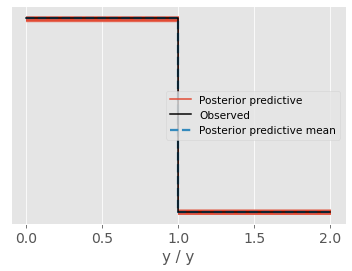

In [ ]:
# posterior check
with model_full_scale:
    post_check = pm.sample_posterior_predictive(trace, var_names = ['alpha', 'beta','y'])
arviz.plot_ppc(arviz.from_pymc3(posterior_predictive=post_check, model=model_full_scale))


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pymc3 as pm
import arviz as az


def compare_posterior(
    trace,
    var_name,
    triangle="lower",
    identity=True,
    figsize=None,
    textsize=None,
    credible_interval=0.94,
    round_to=3,
    point_estimate="mean",
    rope=None,
    ref_val=None,
    kind='kde',
    bw=4.5,
    bins=None
):
    triangle_options = ("lower", "upper", "both")
    assert (
        triangle in triangle_options
    ), f"triangle argument must be 'lower', 'upper' or 'both'."
    
    num_param = trace[var_name].shape[1]
    if figsize is None:
        figsize=(num_param * 2.5, num_param * 2.5)
        
    fig, axes = plt.subplots(num_param, num_param, figsize=figsize)
    for i in range(num_param):
        for j in range(num_param):
            ax = axes[i, j]
            if triangle is "lower" and i < j:
                ax.axis("off")
                continue
            elif triangle is "upper" and i > j:
                ax.axis("off")
                continue

            if i is not j:
                az.plot_posterior(
                    trace[var_name][:, i] - trace[var_name][:, j],
                    ref_val=ref_val,
                    ax=ax,
                    textsize=textsize,
                    credible_interval=credible_interval,
                    round_to=round_to,
                    point_estimate=point_estimate,
                    rope=rope,
                    kind=kind,
                    bw=bw,
                    bins=bins,
                )
                ax.set_xlabel(f"{var_name}_{i} - {var_name}_{j}")
            else:
                if identity:
                    az.plot_posterior(
                        trace[var_name][:, i],
                        ax=ax,
                        textsize=textsize,
                        credible_interval=credible_interval,
                        round_to=round_to,
                        point_estimate=point_estimate,
                        kind=kind,
                        bw=bw,
                        bins=bins,
                    )
                    ax.set_xlabel(f"{var_name}_{i}")
                else:
                    ax.axis("off")
    plt.tight_layout()
    return axes

# Plot
compare_posterior(
    x,
    var_name="beta",
    triangle="lower",
    ref_val=0,
    credible_interval=0.95,
)
plt.show()


In [ ]:
arviz.plot_pair(trace, kind='kde', fill_last=False)

NameError: ignored

In [ ]:

X_shared.set_value(X_test)
Y_shared.set_value(Y_test) # dummy values

with model_full_scale:
    post_pred = pm.sample_posterior_predictive(trace, samples=X_test.shape[0])

In [ ]:
yp = pd.DataFrame(post_pred['y'][0].ravel().tolist())
for i in range(1,len(post_pred['y'])):
  yp.insert(loc = i,column = i, value = post_pred['y'][i].ravel().tolist() )

In [ ]:
yp_= yp.mean(axis = 1)

In [ ]:
y_pred = yp_
print("ROC is :",roc_auc_score(Y_test,y_pred))
fpr, tpr, _ = roc_curve(Y_test, y_pred )
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
ref = pd.DataFrame({'pred': y_pred.tolist(),'act':Y_test})

In [ ]:
ref.to_csv('ref1.csv',index = False)

ROC is : 0.5813895781637718


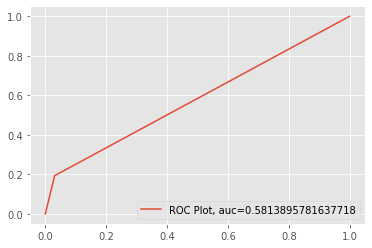

In [ ]:
y_pred = post_pred['y'][-1].ravel().tolist()
print("ROC is :",roc_auc_score(Y_test,y_pred))
fpr, tpr, _ = roc_curve(Y_test, y_pred )
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
df_f

### Top N Features

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 19000
Interrupted at 18,999 [9%]: Average Loss = 1,539.2
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 5_000 tune and 3_000 draw iterations (10_000 + 6_000 draws total) took 133 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.


               mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha        -4.336   0.148  -4.619   -4.067      0.002    0.002    4032.0   
beta[0, 0]    0.194   0.111  -0.012    0.401      0.002    0.001    4670.0   
beta[0, 1]    0.426   0.103   0.231    0.617      0.001    0.001    4780.0   
beta[0, 2]    0.059   0.090  -0.112    0.223      0.001    0.001    5549.0   
beta[0, 3]   -0.010   0.104  -0.217    0.177      0.001    0.001    5275.0   
beta[0, 4]    0.168   0.103  -0.022    0.361      0.001    0.001    6184.0   
beta[0, 5]    0.018   0.103  -0.169    0.217      0.001    0.001    5217.0   
beta[0, 6]    0.127   0.109  -0.085    0.325      0.002    0.001    5291.0   
beta[0, 7]    0.134   0.060   0.027    0.248      0.001    0.001    5346.0   
beta[0, 8]    0.037   0.104  -0.159    0.230      0.001    0.001    5276.0   
beta[0, 9]    0.066   0.138  -0.190    0.328      0.002    0.002    4779.0   
beta[0, 10]   0.078   0.115  -0.131    0.290      0.002    0.001

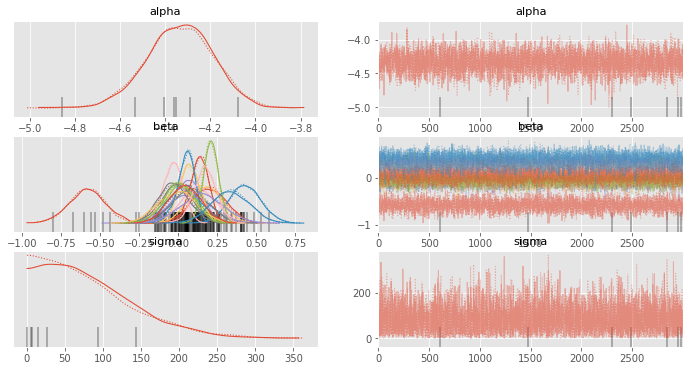

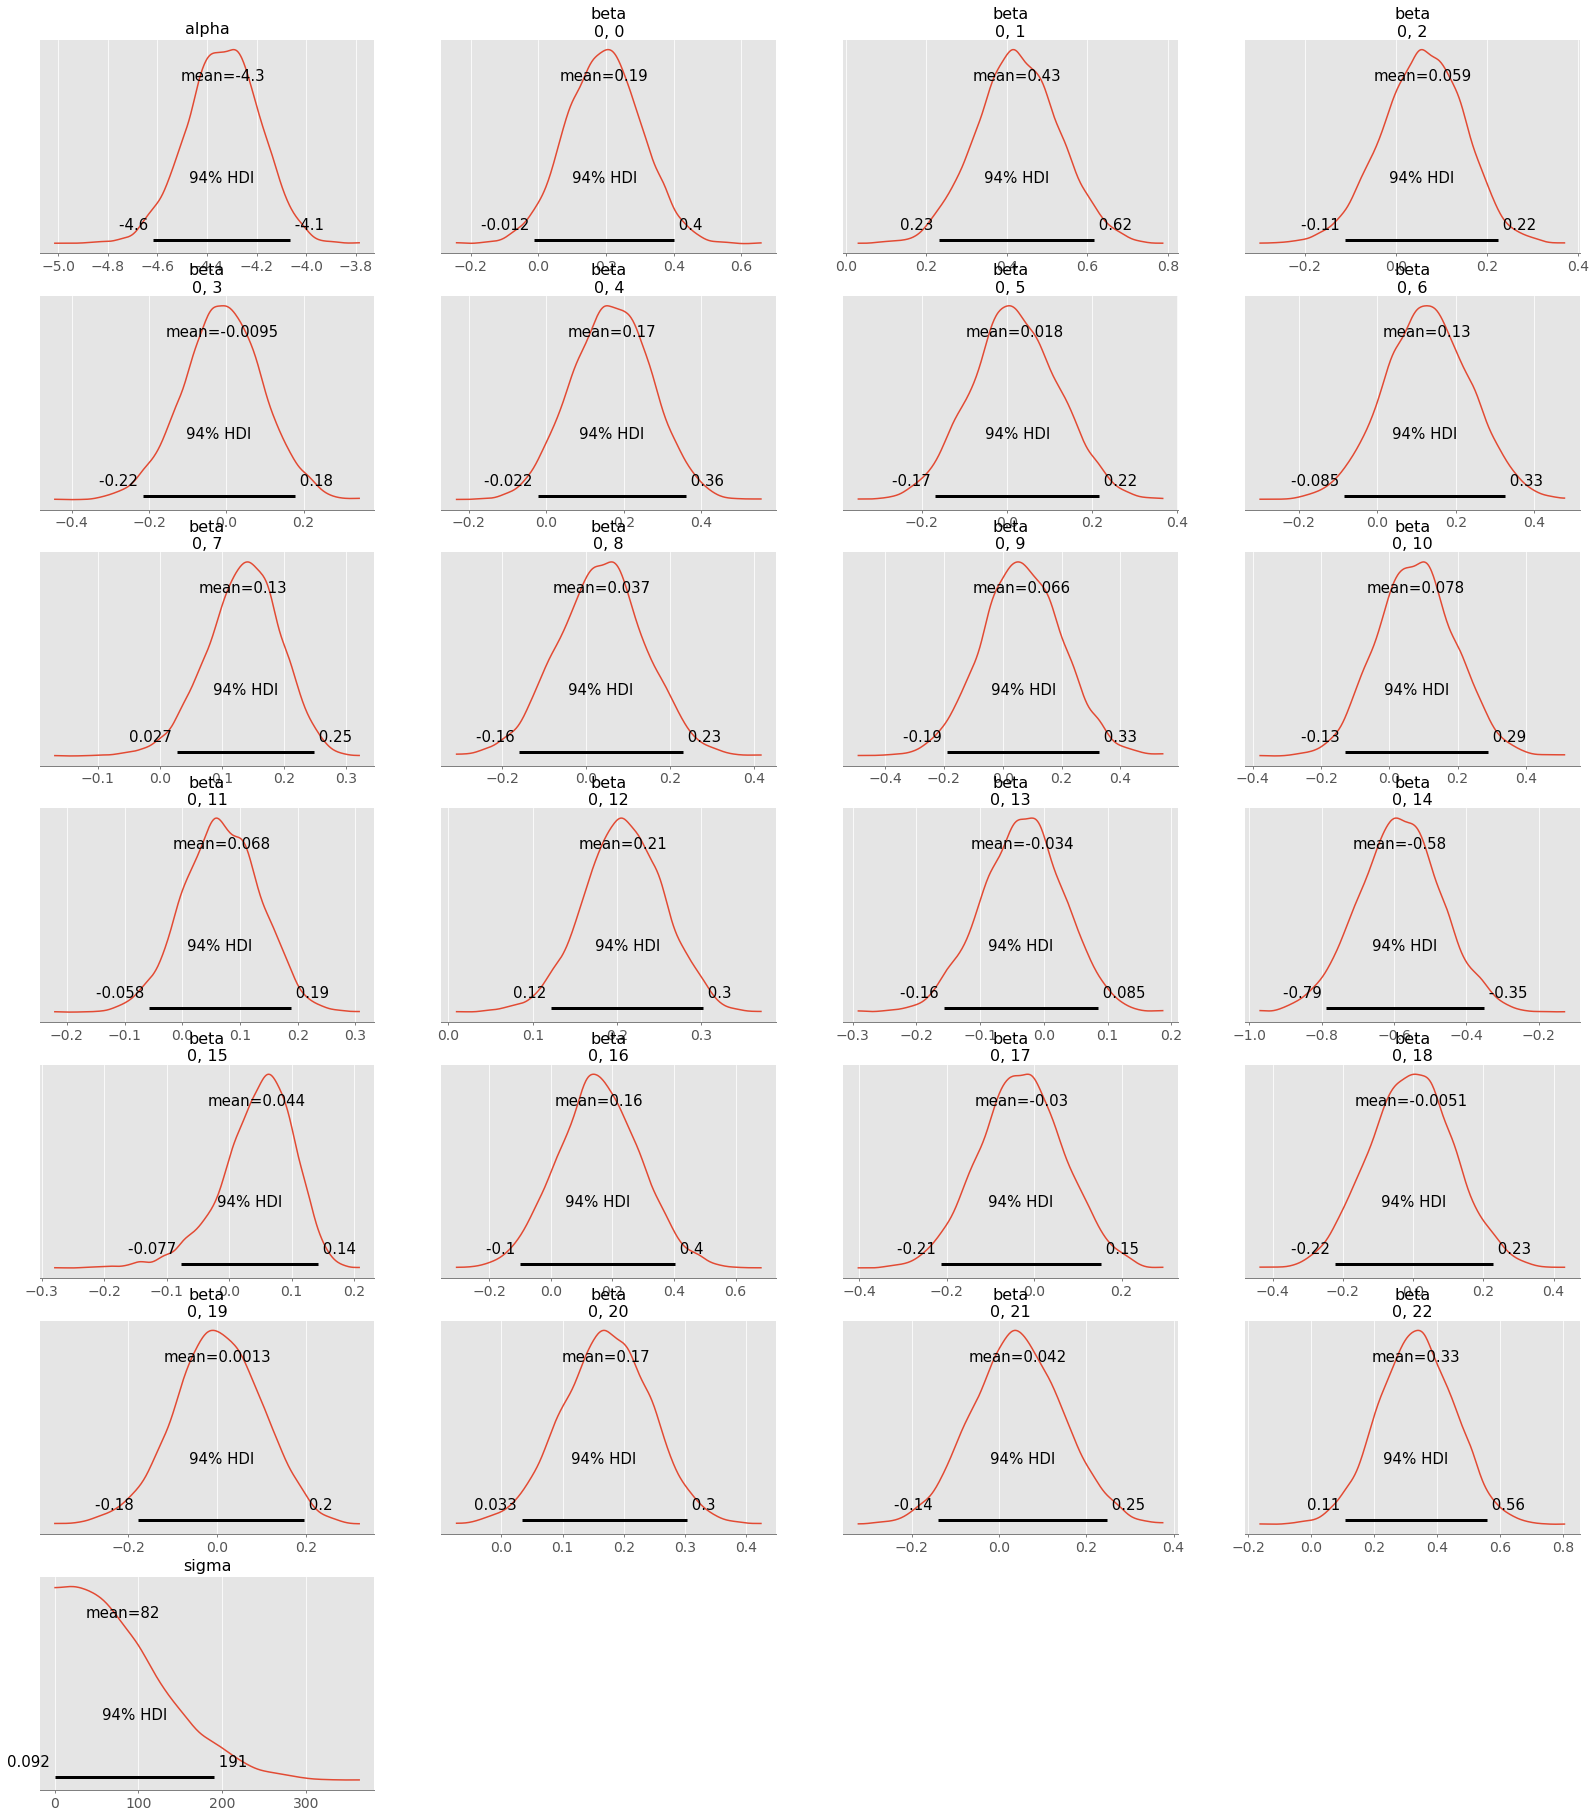

In [ ]:
#TOP N Features
model_top_n = pm.Model()
with model_top_n:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    betas = pm.Normal('beta', 0, 20, shape=(1,X_train.shape[1]))
    sigma = pm.HalfNormal('sigma', sd=100)
    #xdata = pm.Data("pred", X_train.T)
    #mu = alpha + pm.math.dot(betas , X_shared.T)
    logit_p =  pm.math.dot(betas, X_shared.T) + alpha
    p = pm.math.exp(logit_p) / (1 + pm.math.exp(logit_p))

    ##mu = pm.math.dot(betas, X_shared.T) + alpha
    ##logistic = pm.Deterministic('logistic',pm.math.sigmoid(mu))
    
    #f = pm.math.dot(betas,X_shared.T)
    #p = pm.Deterministic('p', 1. / (1. + pm.math.exp(f + alpha))) 
    #p = pm.Deterministic("p", pm.math.invlogit(mu))
    
    # likelihood
    #y = pm.Bernoulli("y",p=p, observed=Y_shared)
    y = pm.Bernoulli("y", logit_p = logit_p, observed=Y_shared)
    
    #likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=Y_shared)
    
    step = pm.NUTS(target_accept = 0.95)
    trace_n_top = pm.sample(3000,init='ADVI+adapt_diag',return_inferencedata=True, tune = 5000)
    #trace1 = pm.sample(3000,return_inferencedata=True, tune = 5000)

    #start = pm.find_MAP()
    #step = pm.NUTS(scaling=start)
    #trace = pm.sample(3000, step, progressbar=True)

    arviz.plot_trace(trace_n_top)
    arviz.plot_posterior(trace_n_top)
    print(pm.summary(trace_n_top))
# Update X values and predict outcomes and probabilities
#with bglm:
 #   pm.set_data({"pred": X_test.T})
  #  posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["y"], samples=600)
  #  model_preds = posterior_predictive["y"]

#dic = pm.sampling.fast_sample_posterior_predictive(trace, var_names = ('a','b','y'), model= model)
#pred_mean = dic['y'].mean()
#with pm.Model() as model:
 #   coeff = pm.Normal('x', mu=0, sd=1)
  #  logistic = pm.math.sigmoid(coeff * x_shared)
  #  pm.Bernoulli('obs', p=logistic, observed=y_shared)
  #  trace = pm.sample()

In [ ]:
# saving trace
trace_n_top.to_netcdf("trace_n_top.nc")
# loading trace
#trace1 = arviz.from_netcdf("trace1.nc")

'trace_n_top.nc'

In [ ]:
trace_n_top

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [ ]:
X_test.shape

(1071, 23)

In [ ]:

X_shared.set_value(X_test)
Y_shared.set_value(Y_test) # dummy values

with model_top_n:
    post_pred = pm.sample_posterior_predictive(trace_n_top, samples=X_test.shape[0])

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


In [ ]:
yp = pd.DataFrame(post_pred['y'][0].ravel().tolist())
for i in range(1,len(post_pred['y'])):
  yp.insert(loc = i,column = i, value = post_pred['y'][i].ravel().tolist() )

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
yp_= yp.mean(axis = 1)

ROC is : 0.803555789104922


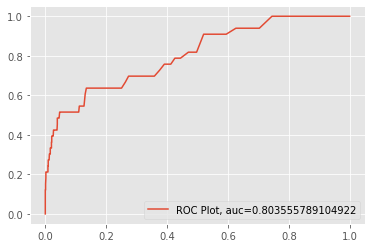

In [ ]:
y_pred = yp_
print("ROC is :",roc_auc_score(Y_test,y_pred))
fpr, tpr, _ = roc_curve(Y_test, y_pred )
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

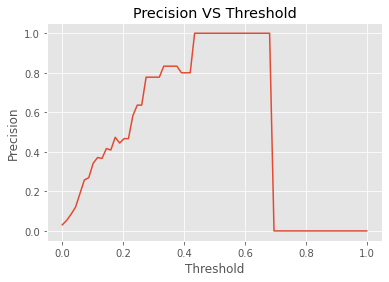

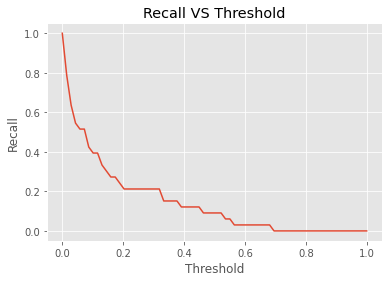

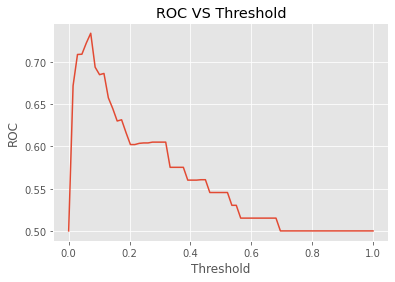

In [ ]:
thr = np.linspace(0,1,70)
precision = []
recall = []
roc = []
for i in thr:
  temp = y_pred >= i
  temp = temp.values.astype('int')
  precision.append(precision_score(Y_test,temp))
  recall.append(recall_score(Y_test,temp))
  roc.append(roc_auc_score(Y_test,temp))

plt.plot(thr,precision)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision VS Threshold')
plt.show()
plt.plot(thr,recall)
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall VS Threshold')
plt.show()
plt.plot(thr,roc)
plt.xlabel('Threshold')
plt.ylabel('ROC')
plt.title('ROC VS Threshold')
plt.show()

In [ ]:
ref = pd.DataFrame({'pred': y_pred.tolist(),'act':Y_test})
ref.to_csv('ref1.csv',index = False)

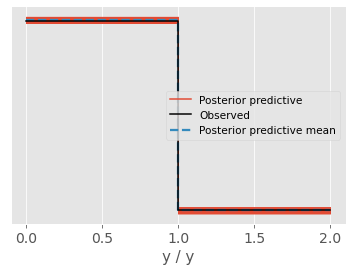

In [ ]:
# posterior check
# posterior check
with model_top_n:
    post_check = pm.sample_posterior_predictive(trace_n_top, var_names = ['alpha', 'beta','y'])
arviz.plot_ppc(arviz.from_pymc3(posterior_predictive=post_check, model=model_top_n))


### STS Top N

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 21700
Interrupted at 21,699 [10%]: Average Loss = 1,535.4
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 5_000 tune and 3_000 draw iterations (10_000 + 6_000 draws total) took 219 seconds.
There were 2620 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4810 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


               mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha        -5.449   0.579  -6.503   -4.487      0.025    0.018     500.0   
beta[0, 0]    0.292   0.108   0.072    0.474      0.003    0.002    1107.0   
beta[0, 1]    0.433   0.105   0.237    0.635      0.003    0.002    1581.0   
beta[0, 2]   -0.040   0.108  -0.243    0.162      0.003    0.002    1415.0   
beta[0, 3]    0.042   0.107  -0.165    0.235      0.003    0.002    1454.0   
beta[0, 4]    0.081   0.070  -0.050    0.209      0.002    0.002    1076.0   
beta[0, 5]    0.130   0.056   0.026    0.235      0.002    0.001    1127.0   
beta[0, 6]   -0.007   0.109  -0.205    0.200      0.004    0.003    1001.0   
beta[0, 7]    0.094   0.103  -0.101    0.284      0.003    0.002     997.0   
beta[0, 8]   -0.027   0.100  -0.216    0.155      0.003    0.002    1415.0   
beta[0, 9]   -0.075   0.112  -0.274    0.138      0.003    0.002    1940.0   
beta[0, 10]   0.090   0.104  -0.104    0.286      0.003    0.002

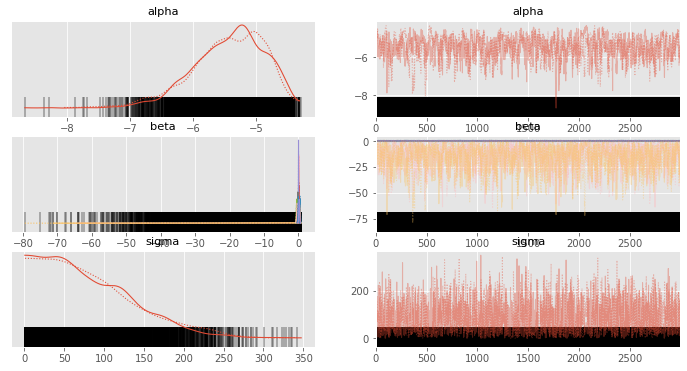

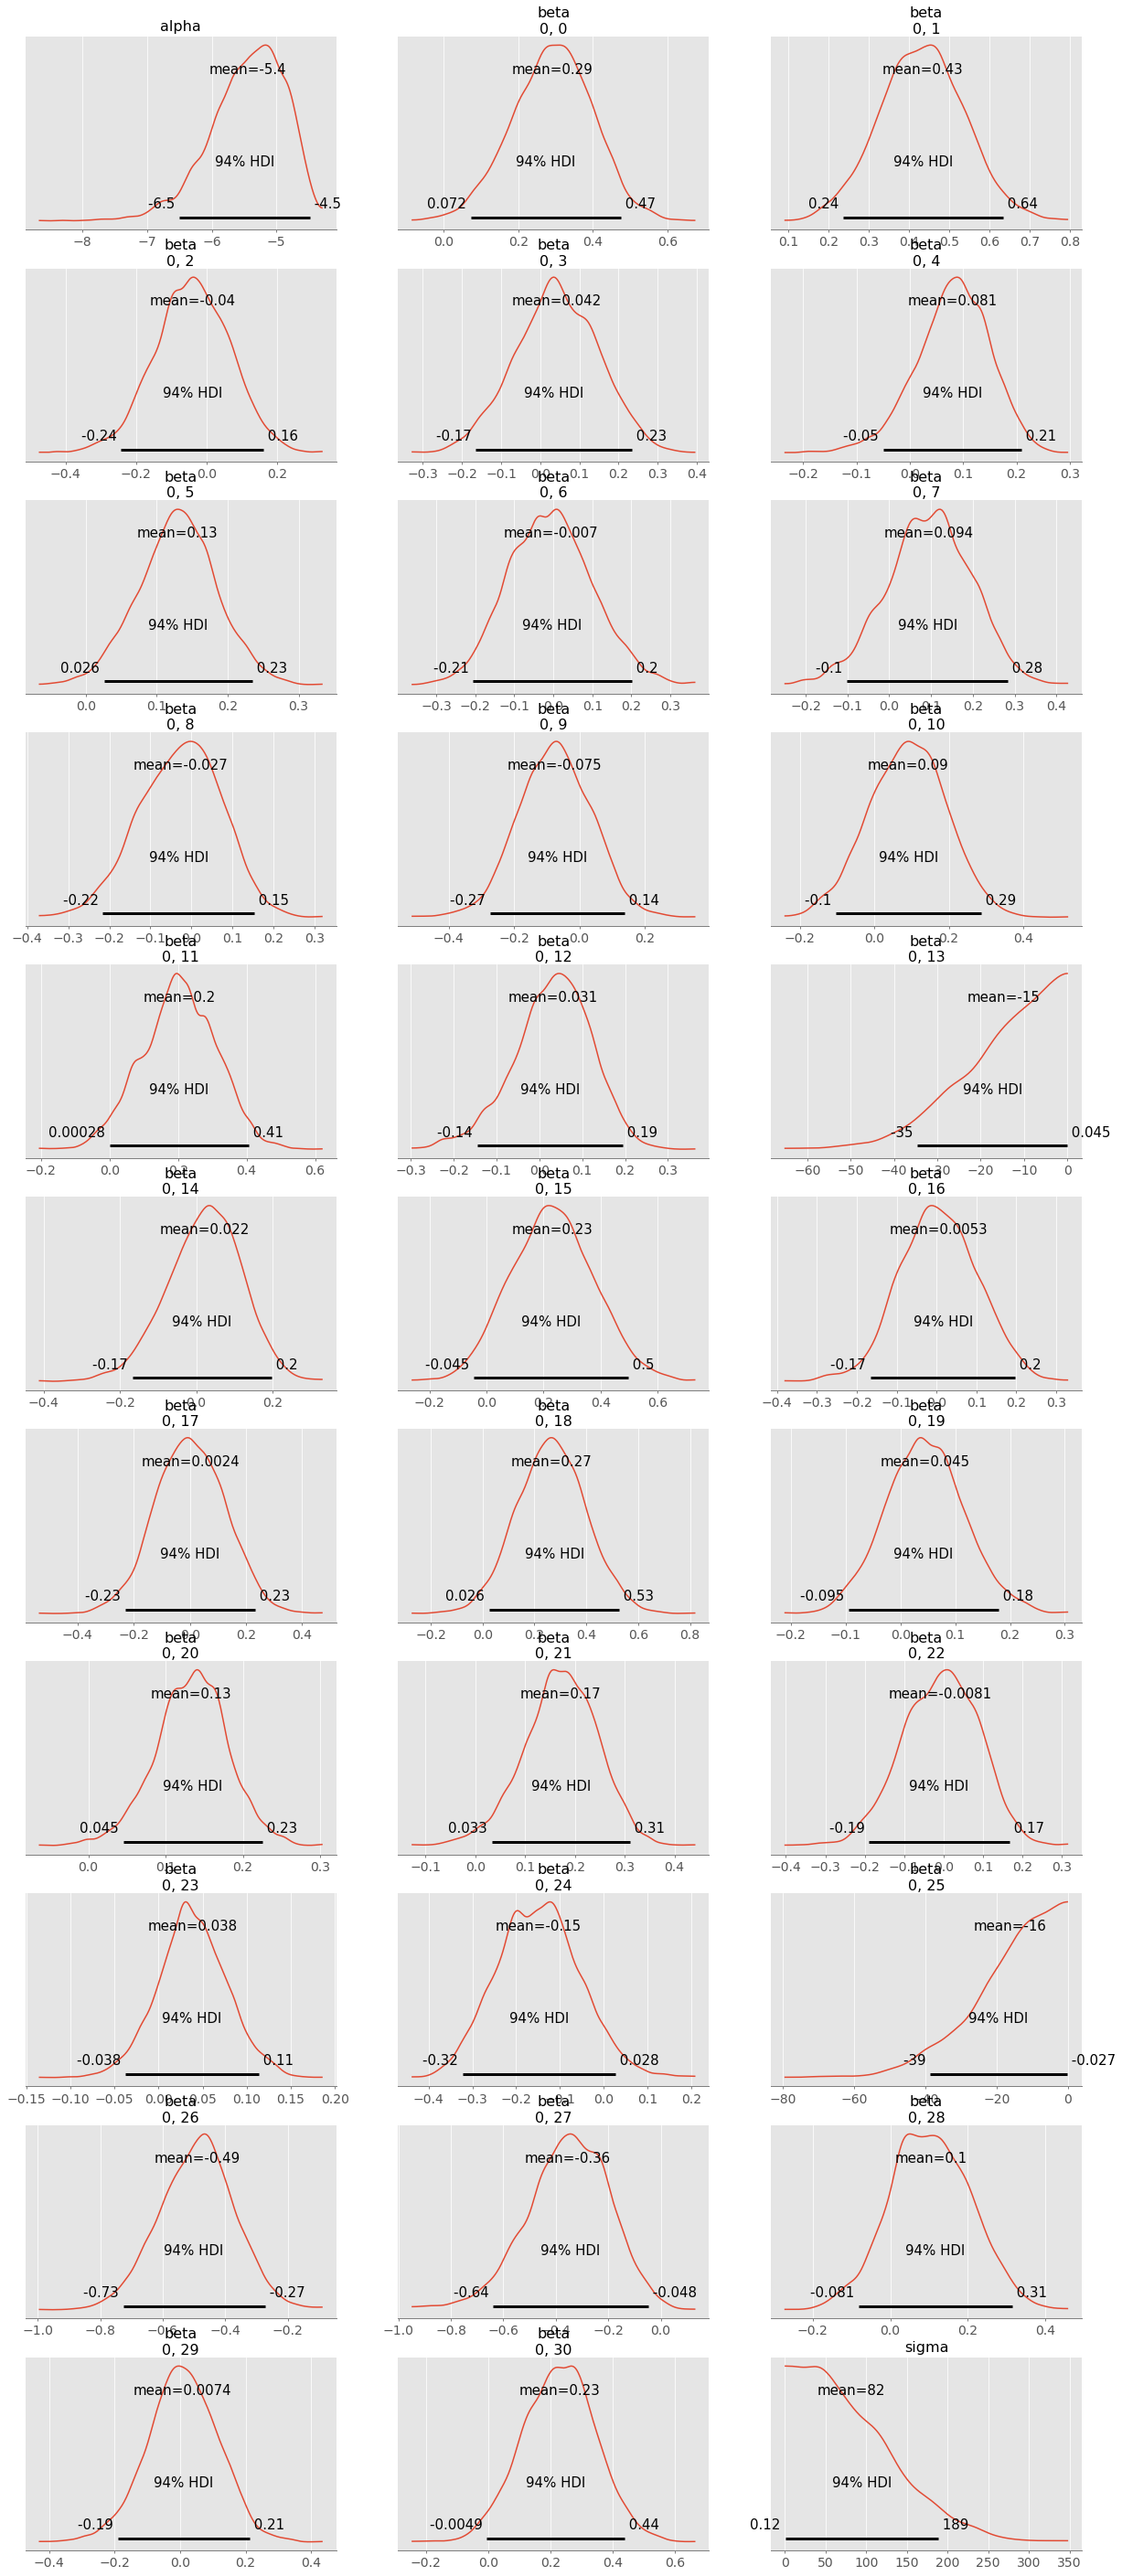

In [ ]:
#TOP N Features
model_sts = pm.Model()
with model_sts:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    betas = pm.Normal('beta', 0, 20, shape=(1,X_train.shape[1]))
    sigma = pm.HalfNormal('sigma', sd=100)
    #xdata = pm.Data("pred", X_train.T)
    #mu = alpha + pm.math.dot(betas , X_shared.T)
    logit_p =  pm.math.dot(betas, X_shared.T) + alpha
    p = pm.math.exp(logit_p) / (1 + pm.math.exp(logit_p))

    ##mu = pm.math.dot(betas, X_shared.T) + alpha
    ##logistic = pm.Deterministic('logistic',pm.math.sigmoid(mu))
    
    #f = pm.math.dot(betas,X_shared.T)
    #p = pm.Deterministic('p', 1. / (1. + pm.math.exp(f + alpha))) 
    #p = pm.Deterministic("p", pm.math.invlogit(mu))
    
    # likelihood
    #y = pm.Bernoulli("y",p=p, observed=Y_shared)
    y = pm.Bernoulli("y", logit_p = logit_p, observed=Y_shared)
    
    #likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=Y_shared)
    
    step = pm.NUTS(target_accept = 0.95)
    trace_sts = pm.sample(3000,init='ADVI+adapt_diag',return_inferencedata=True, tune = 5000)
    #trace1 = pm.sample(3000,return_inferencedata=True, tune = 5000)

    #start = pm.find_MAP()
    #step = pm.NUTS(scaling=start)
    #trace = pm.sample(3000, step, progressbar=True)

    arviz.plot_trace(trace_sts)
    arviz.plot_posterior(trace_sts)
    print(pm.summary(trace_sts))
# Update X values and predict outcomes and probabilities
#with bglm:
 #   pm.set_data({"pred": X_test.T})
  #  posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["y"], samples=600)
  #  model_preds = posterior_predictive["y"]

#dic = pm.sampling.fast_sample_posterior_predictive(trace, var_names = ('a','b','y'), model= model)
#pred_mean = dic['y'].mean()
#with pm.Model() as model:
 #   coeff = pm.Normal('x', mu=0, sd=1)
  #  logistic = pm.math.sigmoid(coeff * x_shared)
  #  pm.Bernoulli('obs', p=logistic, observed=y_shared)
  #  trace = pm.sample()

In [ ]:
post_check['beta'].mean(0)

array([[ 0.194 ,  0.4262,  0.059 , -0.0095,  0.1681,  0.0182,  0.1274,
         0.1339,  0.0365,  0.0656,  0.0779,  0.0685,  0.2075, -0.034 ,
        -0.5838,  0.0444,  0.1557, -0.0298, -0.0051,  0.0013,  0.1711,
         0.0419,  0.3335]])

In [ ]:
# saving trace
trace_sts.to_netcdf("trace_sts.nc")
# loading trace
#trace1 = arviz.from_netcdf("trace1.nc")

'trace_n_top.nc'

In [ ]:
trace_n_top

In [ ]:
post_pred

In [ ]:

X_shared.set_value(X_test)
Y_shared.set_value(Y_test) # dummy values

with model_sts:
    post_pred = pm.sample_posterior_predictive(trace_sts, samples=X_test.shape[0])

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


In [ ]:
yp = pd.DataFrame(post_pred['y'][0].ravel().tolist())
for i in range(1,len(post_pred['y'])):
  yp.insert(loc = i,column = i, value = post_pred['y'][i].ravel().tolist() )

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
post_pred['y'].mean(0)

array([[0.0075, 0.0037, 0.0261, ..., 0.0215, 0.0308, 0.0168]])

In [ ]:
yp_

In [ ]:
yp_= yp.mean(axis = 1)

ROC is : 0.8107235142118863


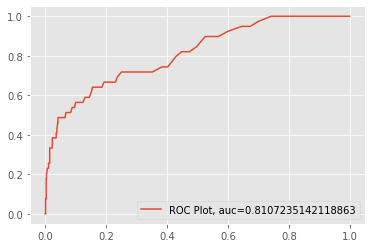

In [ ]:
y_pred = yp_
print("ROC is :",roc_auc_score(Y_test,y_pred))
fpr, tpr, _ = roc_curve(Y_test, y_pred )
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Best Threshold for ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.039216


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

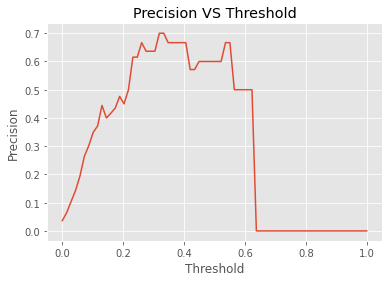

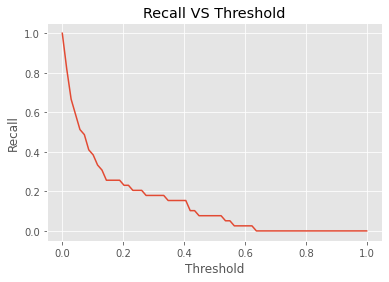

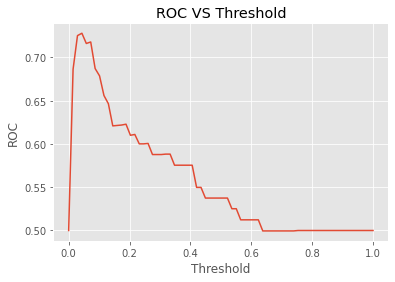

In [ ]:
thr = np.linspace(0,1,70)
precision = []
recall = []
roc = []
for i in thr:
  temp = y_pred >= i
  temp = temp.values.astype('int')
  precision.append(precision_score(Y_test,temp))
  recall.append(recall_score(Y_test,temp))
  roc.append(roc_auc_score(Y_test,temp))

plt.plot(thr,precision)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision VS Threshold')
plt.show()
plt.plot(thr,recall)
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall VS Threshold')
plt.show()
plt.plot(thr,roc)
plt.xlabel('Threshold')
plt.ylabel('ROC')
plt.title('ROC VS Threshold')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


Best Threshold=0.128852, F-Score=0.388


AUC is  0.27970747295813475


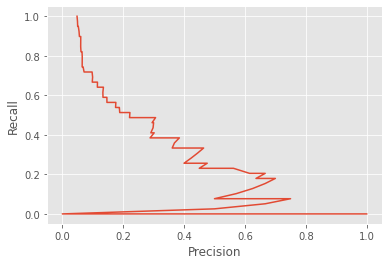

In [ ]:
# Precision Recall Curve 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
prec, rec,_ = precision_recall_curve(Y_test, y_pred)
fscore = (2 * prec * rec) / (prec + rec)
fscore = fscore[~np.isnan(fscore)]
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (_[ix], fscore[ix]))
print("\n\nAUC is ", auc(rec, prec))
plt.plot(prec,rec)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

In [ ]:
ref = pd.DataFrame({'pred': y_pred.tolist(),'act':Y_test})
ref.to_csv('ref1.csv',index = False)

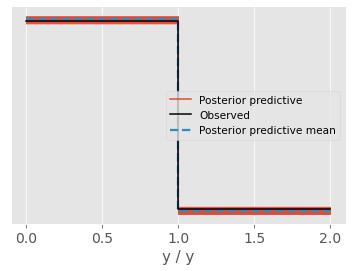

In [ ]:
# posterior check
# posterior check
with model_sts:
    post_check = pm.sample_posterior_predictive(trace_sts, var_names = ['alpha', 'beta','y'])
arviz.plot_ppc(arviz.from_pymc3(posterior_predictive=post_check, model=model_sts))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49e8718b10>],
      dtype=object)

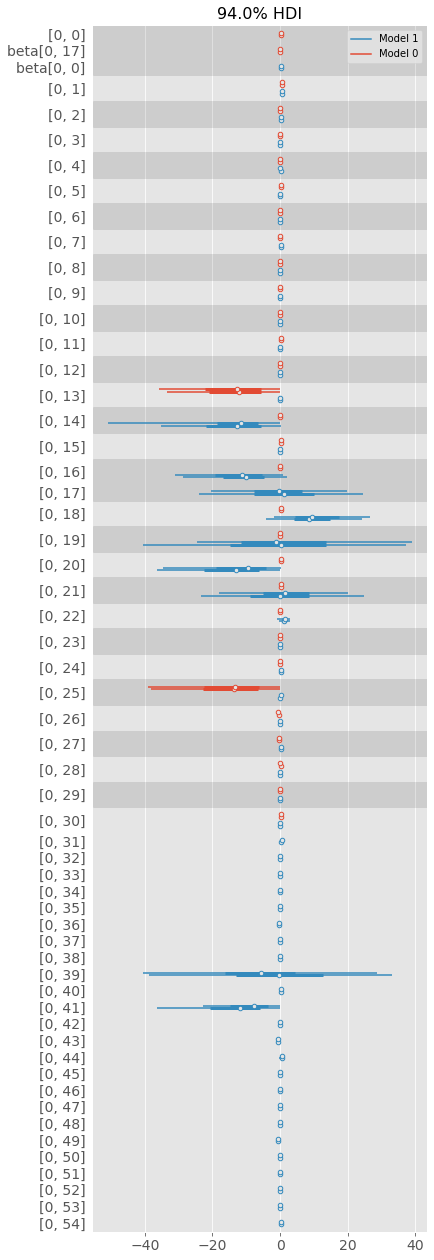

In [ ]:
arviz.plot_forest([trace_sts,trace1], var_names= ['beta'])

In [ ]:
b = post_check['beta'].mean(0).ravel().tolist()

In [ ]:
minority = df_sts[df_sts['target']==1]

In [ ]:
pred = []
for i in range (0,df_sts.shape[0]):
  v = df_sts.iloc[i:i+1,:-1].values.ravel().tolist() 
  t = 1/(1+np.exp(-np.dot(b,v)))
  pred.append(t)

In [ ]:
pred_ = pd.Series(pred) >= 0.6
pred_ = pred_.values.astype('int')

In [ ]:
pred_.sum()

3791

In [ ]:
m = df_sts[df_sts['target']==0]
np.dot(b,m.iloc[0:1,:-1].values.ravel().tolist())

1.5768

In [ ]:
ll = pd.DataFrame({'b':b,'v':m.iloc[0:1,:-1].values.ravel().tolist()})
ll.to_csv('gg.csv',index = False)

In [ ]:
1/(1+np.exp(-1.5845))

0.8298

## Trials

In [ ]:
#df0 = df
#df0 = df_s
#df0 = df_f
df0 = df_s[df_s['target']==0]
df0 = df0.sample(frac = 1)

data_X = df0.iloc[:,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df0.iloc[:,len(df0.columns)-1] # target variable only

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=44)

#xgb = SelectFromModel(XGBClassifier(n_estimators = 1000), threshold=0.002 )
#xgb.fit(X_train, Y_train)
#selected_feat= len(X_train.columns[(xgb.get_support())])
#print(selected_feat)
#col_names = X_train.columns[(xgb.get_support())]
#print(col_names)

#X_train_xgb = xgb.transform(X_train)
#X_test_xgb = xgb.transform(X_test)

#X_shared = shared(X_train_xgb)
#Y_shared = shared(Y_train.values)

X_shared = shared(X_train.values)
Y_shared = shared(Y_train.values)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 5_000 tune and 3_000 draw iterations (10_000 + 6_000 draws total) took 389 seconds.
There were 2844 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5787 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/arviz/plots/plot_utils.py:277: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (57) in plot_posterior, generating only 40 plots
  UserWarning,


               mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha       -64.008   6.468 -76.334  -51.177      0.942    0.670      50.0   
beta[0, 0]   -0.465   3.773  -8.055    5.557      1.183    0.862      11.0   
beta[0, 1]    0.626   2.782  -4.725    6.058      0.375    0.267      55.0   
beta[0, 2]   -1.590   3.241  -7.707    4.264      0.462    0.329      50.0   
beta[0, 3]   -1.532   2.769  -6.244    3.714      0.919    0.674       9.0   
beta[0, 4]   -0.905   2.897  -5.743    5.109      0.858    0.623      14.0   
beta[0, 5]   -0.529   3.567  -7.447    6.645      0.551    0.393      41.0   
beta[0, 6]    0.261   3.511  -7.104    6.133      0.795    0.767      20.0   
beta[0, 7]    1.161   2.943  -4.573    6.819      0.469    0.334      43.0   
beta[0, 8]   -0.483   3.001  -7.090    4.654      0.495    0.353      36.0   
beta[0, 9]   -2.329   2.862  -7.336    2.490      0.318    0.226      65.0   
beta[0, 10]  -5.174   5.199 -13.987    3.099      1.395    1.324

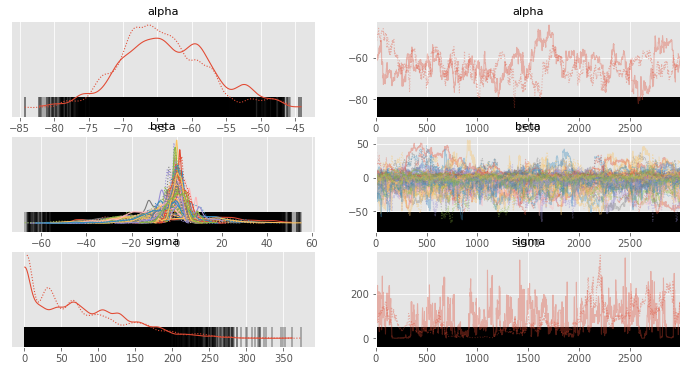

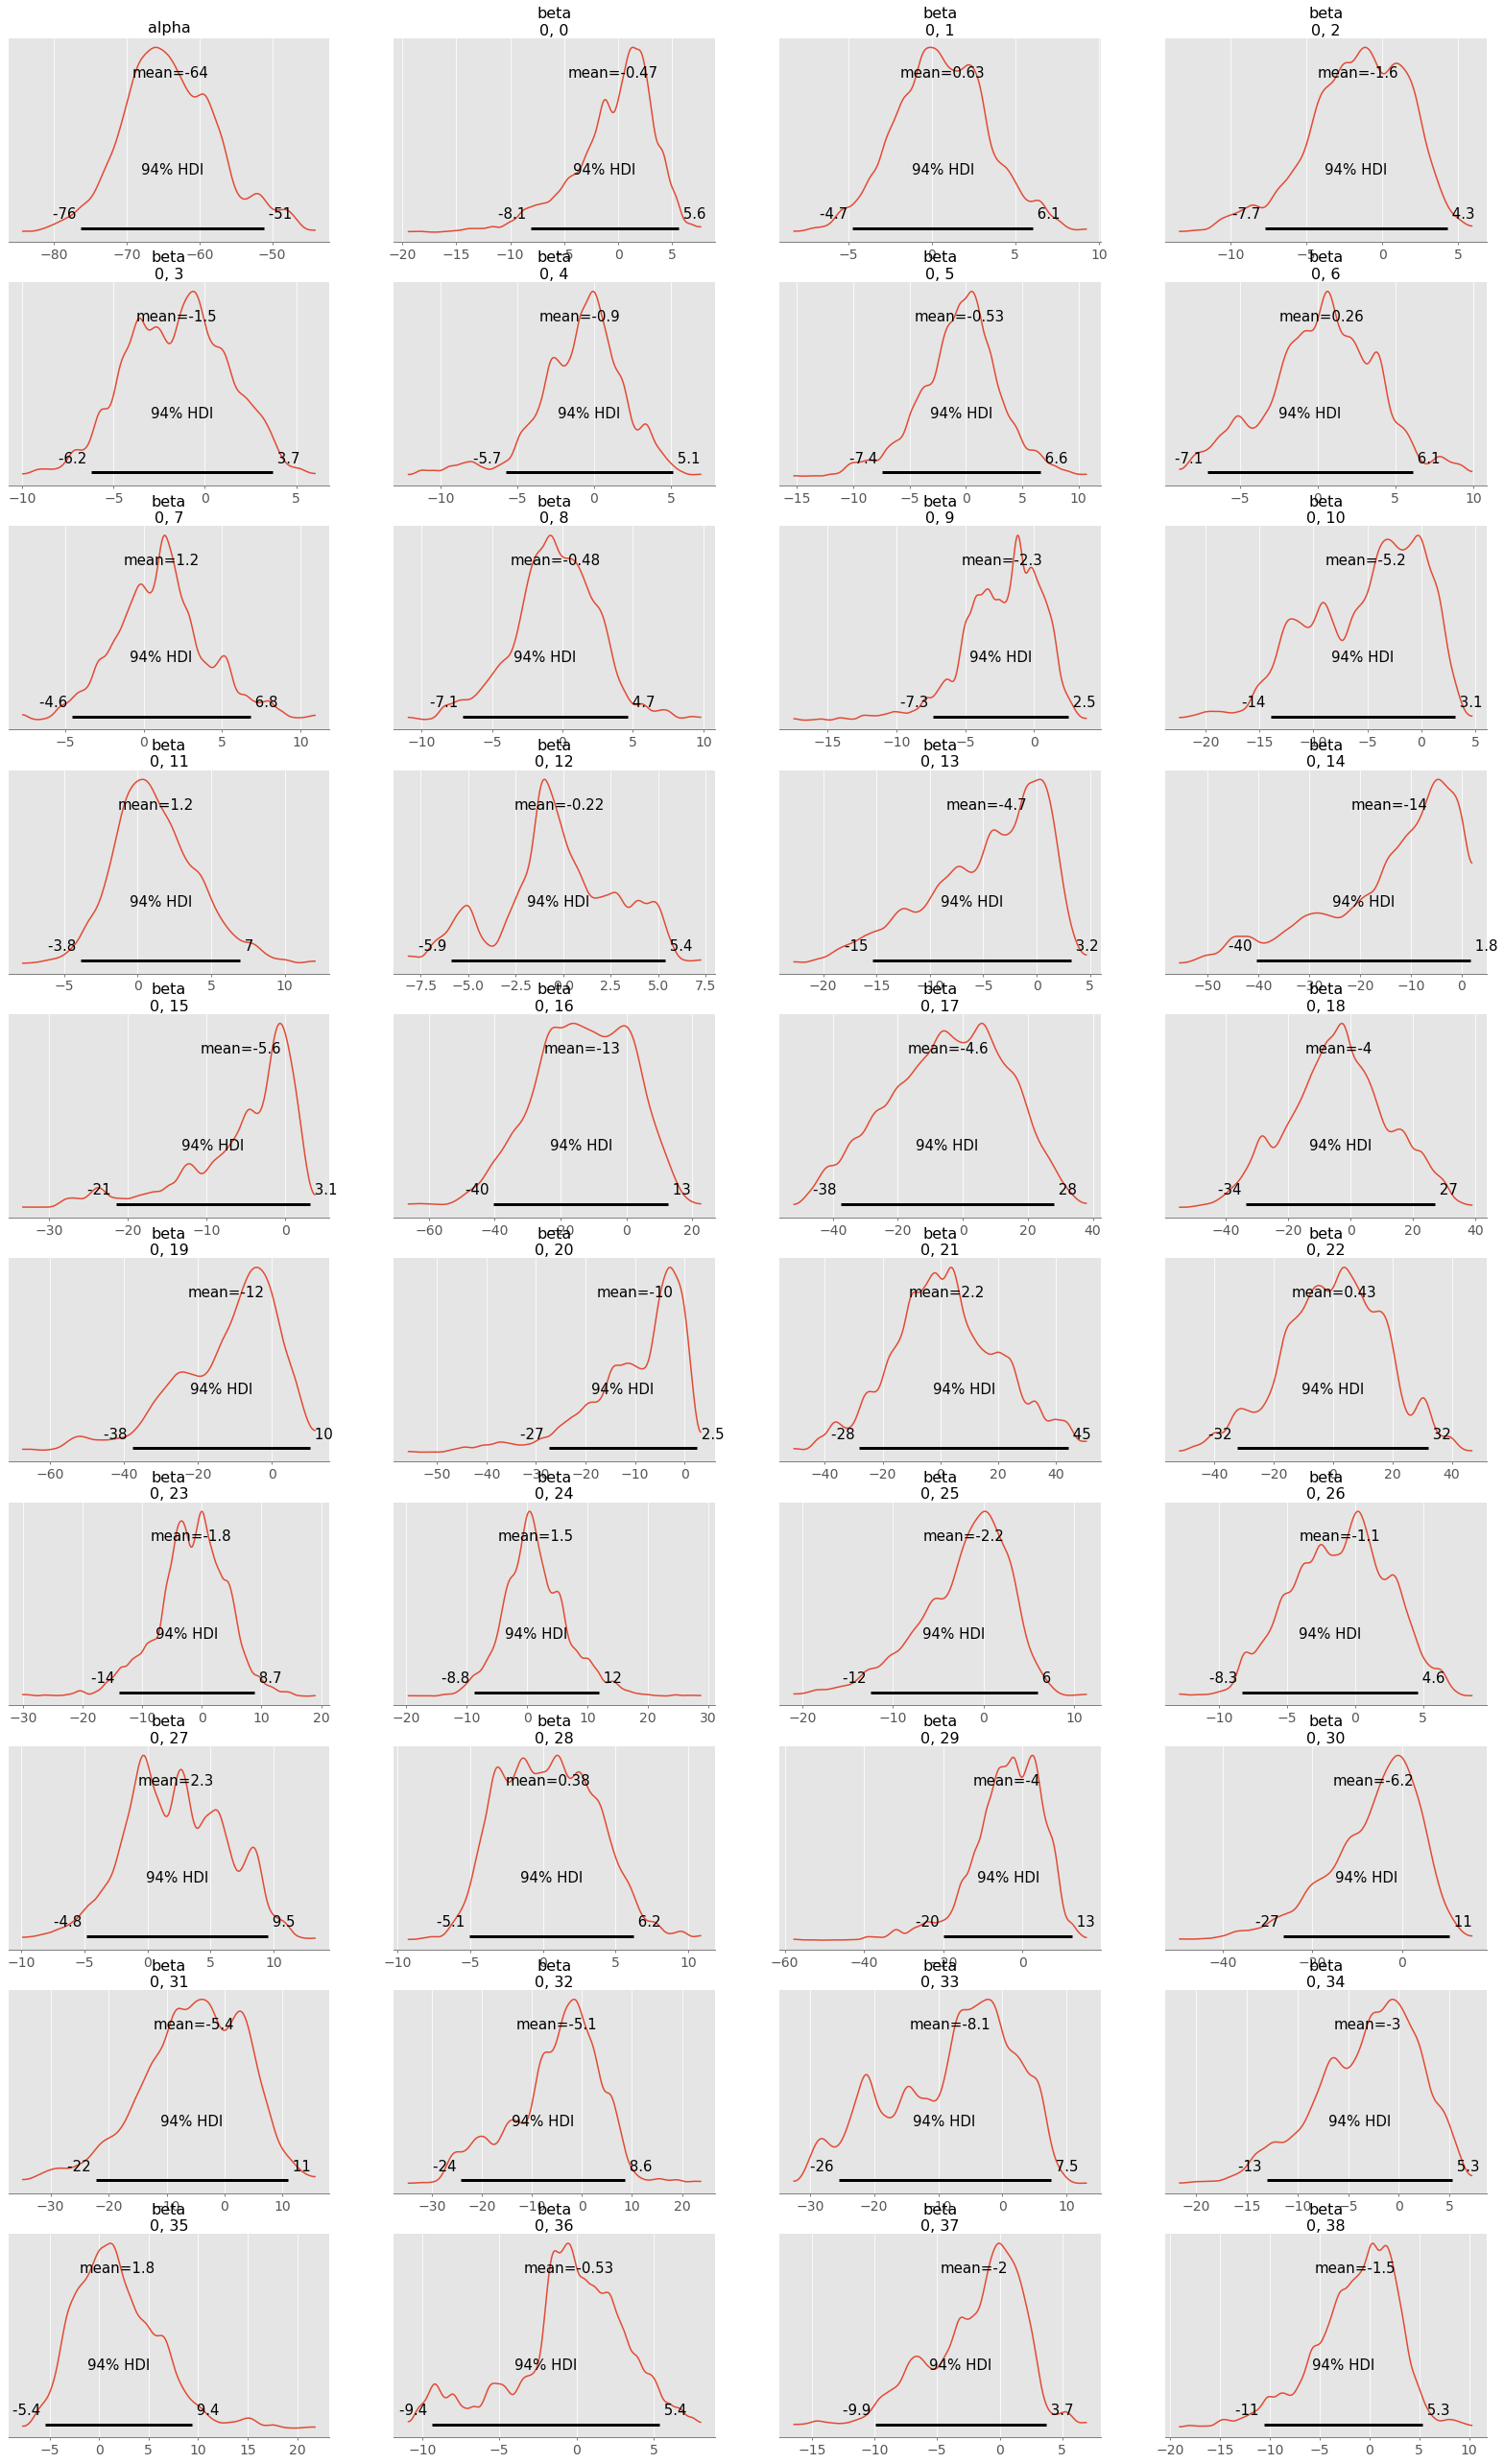

In [ ]:
#coords = {"observation": df0.index.values}
model_maj = pm.Model()
with model_maj:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    betas = pm.Normal('beta', 0, 20, shape=(1,X_train.shape[1]))
    sigma = pm.HalfNormal('sigma', sd=100)
    #xdata = pm.Data("pred", X_train.T)
    #mu = alpha + pm.math.dot(betas , X_shared.T)
    logit_p =  pm.math.dot(betas, X_shared.T) + alpha
    p = pm.math.exp(logit_p) / (1 + pm.math.exp(logit_p))

    ##mu = pm.math.dot(betas, X_shared.T) + alpha
    ##logistic = pm.Deterministic('logistic',pm.math.sigmoid(mu))
    
    #f = pm.math.dot(betas,X_shared.T)
    #p = pm.Deterministic('p', 1. / (1. + pm.math.exp(f + alpha))) 
    #p = pm.Deterministic("p", pm.math.invlogit(mu))
    
    # likelihood
    #y = pm.Bernoulli("y",p=p, observed=Y_shared)
    y = pm.Bernoulli("y", logit_p = logit_p, observed=Y_shared)
    
    #likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=Y_shared)
    
    step = pm.NUTS(target_accept = 0.95)
    #trace1 = pm.sample(3000,init='ADVI+adapt_diag',return_inferencedata=True, tune = 5000)
    trace_maj = pm.sample(3000,return_inferencedata=True, tune = 5000)

    #start = pm.find_MAP()
    #step = pm.NUTS(scaling=start)
    #trace = pm.sample(3000, step, progressbar=True)

    arviz.plot_trace(trace_maj)
    arviz.plot_posterior(trace_maj)
    print(pm.summary(trace_maj))
# Update X values and predict outcomes and probabilities
#with bglm:
 #   pm.set_data({"pred": X_test.T})
  #  posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["y"], samples=600)
  #  model_preds = posterior_predictive["y"]

#dic = pm.sampling.fast_sample_posterior_predictive(trace, var_names = ('a','b','y'), model= model)
#pred_mean = dic['y'].mean()
#with pm.Model() as model:
 #   coeff = pm.Normal('x', mu=0, sd=1)
  #  logistic = pm.math.sigmoid(coeff * x_shared)
  #  pm.Bernoulli('obs', p=logistic, observed=y_shared)
  #  trace = pm.sample()

In [ ]:
with model_maj:
    post_check = pm.sample_posterior_predictive(trace_maj, var_names = ['alpha', 'beta','y'])

In [ ]:
be = post_check['beta'].mean(0).ravel().tolist()
tt = df.iloc[5:6,:-1]
np.dot(be,tt.values.ravel().tolist())

23.5770

In [ ]:
xx = pd.DataFrame({'be':be,'tt':tt.values.ravel().tolist()})
xx.to_csv('tt.csv',index = False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49e71256d0>],
      dtype=object)

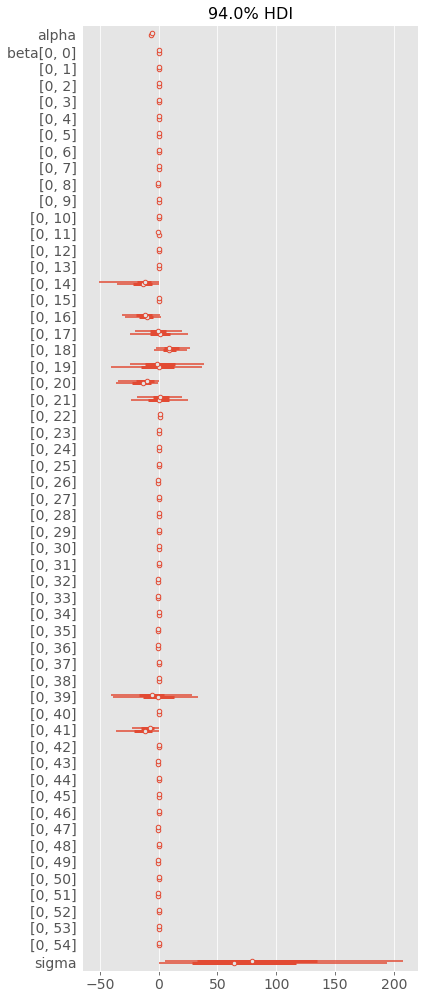

In [ ]:
arviz.plot_forest(trace_maj)

In [ ]:
# saving trace
trace_maj.to_netcdf("trace1.nc")
# loading trace
#trace1 = arviz.from_netcdf("trace1.nc")

'trace1.nc'

In [ ]:

X_shared.set_value(X_test)
Y_shared.set_value(Y_test) # dummy values

with model_maj:
    post_pred = pm.sample_posterior_predictive(trace_maj, samples=X_test.shape[0])

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


In [ ]:
yp = pd.DataFrame(post_pred['y'][0].ravel().tolist())
for i in range(1,len(post_pred['y'])):
  yp.insert(loc = i,column = i, value = post_pred['y'][i].ravel().tolist() )

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
yp_= yp.mean(axis = 1)

ROC is : 0.44293136541134426


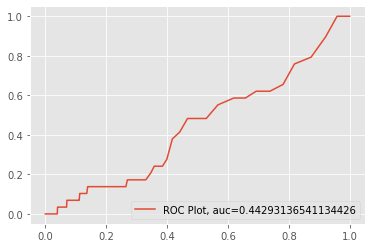

In [ ]:
y_pred = yp_
print("ROC is :",roc_auc_score(Y_test,y_pred))
fpr, tpr, _ = roc_curve(Y_test, y_pred )
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
thr = np.linspace(0,1,70)
precision = []
recall = []
roc = []
for i in thr:
  temp = y_pred >= i
  temp = temp.values.astype('int')
  precision.append(precision_score(Y_test,temp))
  recall.append(recall_score(Y_test,temp))
  roc.append(roc_auc_score(Y_test,temp))

plt.plot(thr,precision)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision VS Threshold')
plt.show()
plt.plot(thr,recall)
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall VS Threshold')
plt.show()
plt.plot(thr,roc)
plt.xlabel('Threshold')
plt.ylabel('ROC')
plt.title('ROC VS Threshold')
plt.show()

In [ ]:
ref = pd.DataFrame({'pred': y_pred.tolist(),'act':Y_test})
ref.to_csv('ref1.csv',index = False)

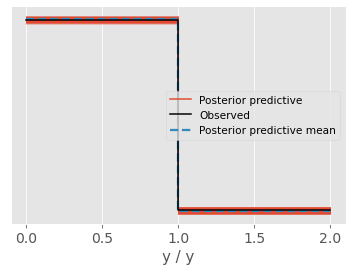

In [ ]:
# posterior check
# posterior check
with model:
    post_check = pm.sample_posterior_predictive(trace1, var_names = ['alpha', 'beta','y'])
arviz.plot_ppc(arviz.from_pymc3(posterior_predictive=post_check, model=model))


# Models (With Feature Selection)

## Chi-2 Feature Selection

In [ ]:
df0 = df0.sample(frac = 1)

data_X = df0.iloc[:,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df0.iloc[:,len(df0.columns)-1] # target variable only



# Feature selection based on chi2 values
chi2_selector = SelectKBest(chi2)
chi2_selector.fit(data_X, data_Y)


chi2_scores = pd.DataFrame(list(zip(data_X.columns, chi2_selector.scores_, chi2_selector.pvalues_)), columns = ['Feature', 'Score', 'p_val'])
print("Chi-2 Scores\n",chi2_scores)
boolean_list = chi2_scores['Score'] > 10
new_data_X = data_X.loc[:,boolean_list.values.tolist()]
#new_data_X = new_data_X.drop(['patient_age'], axis = 1)
new_data = new_data_X
new_data['in_hospital_mortality'] = df0['in_hospital_mortality']
print("\nNew selected features\n:" , new_data.columns)

X_train, X_test, Y_train, Y_test = train_test_split(new_data_X, data_Y,test_size = 0.20 ,random_state=42)


#scaler = StandardScaler() # scaling
# Fit on training set only.
#scaler.fit(X_train)
# Apply transform to both the training set and the test set.
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test) 

X_shared = shared(X_train.values)
Y_shared = shared(Y_train.values)

Chi-2 Scores
                               Feature       Score         p_val
0                           gender_id    0.025502  8.731238e-01
1                         patient_age   52.821987  3.651901e-13
2                Admission_to_surgery   24.452338  7.617103e-07
3                                 BMI    3.381145  6.594624e-02
4                  Active_tobacco_use    0.547673  4.592702e-01
5                       f_history_cad    2.852027  9.125880e-02
6                            diabetes    0.066508  7.964913e-01
7                     last_hematocrit    2.378184  1.230405e-01
8                        Dyslipidemia    3.762474  5.241497e-02
9                last_cretenine_preop   21.201546  4.134309e-06
10                           dialysis   52.592499  4.104540e-13
11                       hypertension    0.001293  9.713135e-01
12                         BPsystolic    6.116785  1.339041e-02
13             Cerebovascular_disease    2.046946  1.525118e-01
14                    Caro

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Bayesian Model (With only Chi-2 Feature Selection)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 102500
Interrupted at 102,499 [51%]: Average Loss = 1,644.9
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 216 seconds.
There were 603 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1423 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/arviz/plots/plot_utils.py:277: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (4301) in plot_posterior, generating only 40 plots
  UserWarning,


                    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
alpha             -8.487  7.899 -23.395    5.912      0.535    0.379   
beta[0, 0]        -0.163  0.146  -0.432    0.120      0.009    0.007   
beta[0, 1]        -0.342  0.691  -1.658    0.757      0.055    0.039   
beta[0, 2]        -0.221  1.054  -2.132    1.595      0.071    0.050   
beta[0, 3]         0.723  5.615  -8.931   10.787      0.387    0.274   
...                  ...    ...     ...      ...        ...      ...   
logistic[0, 4276]  0.000  0.000   0.000    0.000      0.000    0.000   
logistic[0, 4277]  0.000  0.000   0.000    0.000      0.000    0.000   
logistic[0, 4278]  0.000  0.000   0.000    0.000      0.000    0.000   
logistic[0, 4279]  0.000  0.000   0.000    0.000      0.000    0.000   
logistic[0, 4280]  0.000  0.000   0.000    0.000      0.000    0.000   

                   ess_bulk  ess_tail  r_hat  
alpha                 221.0     258.0   1.01  
beta[0, 0]            236.0     362.0   1

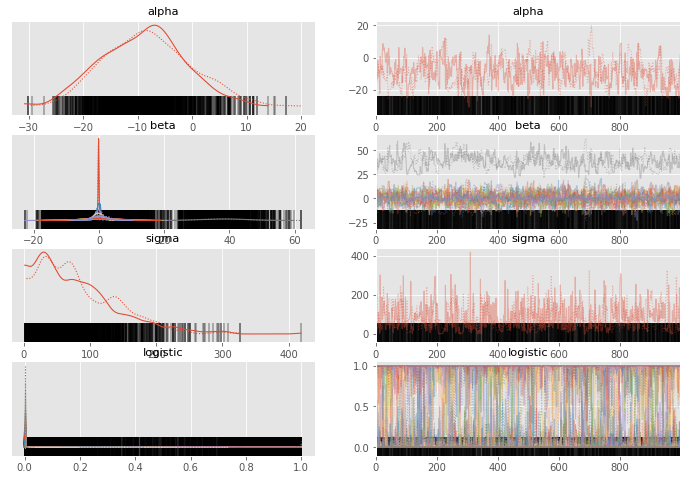

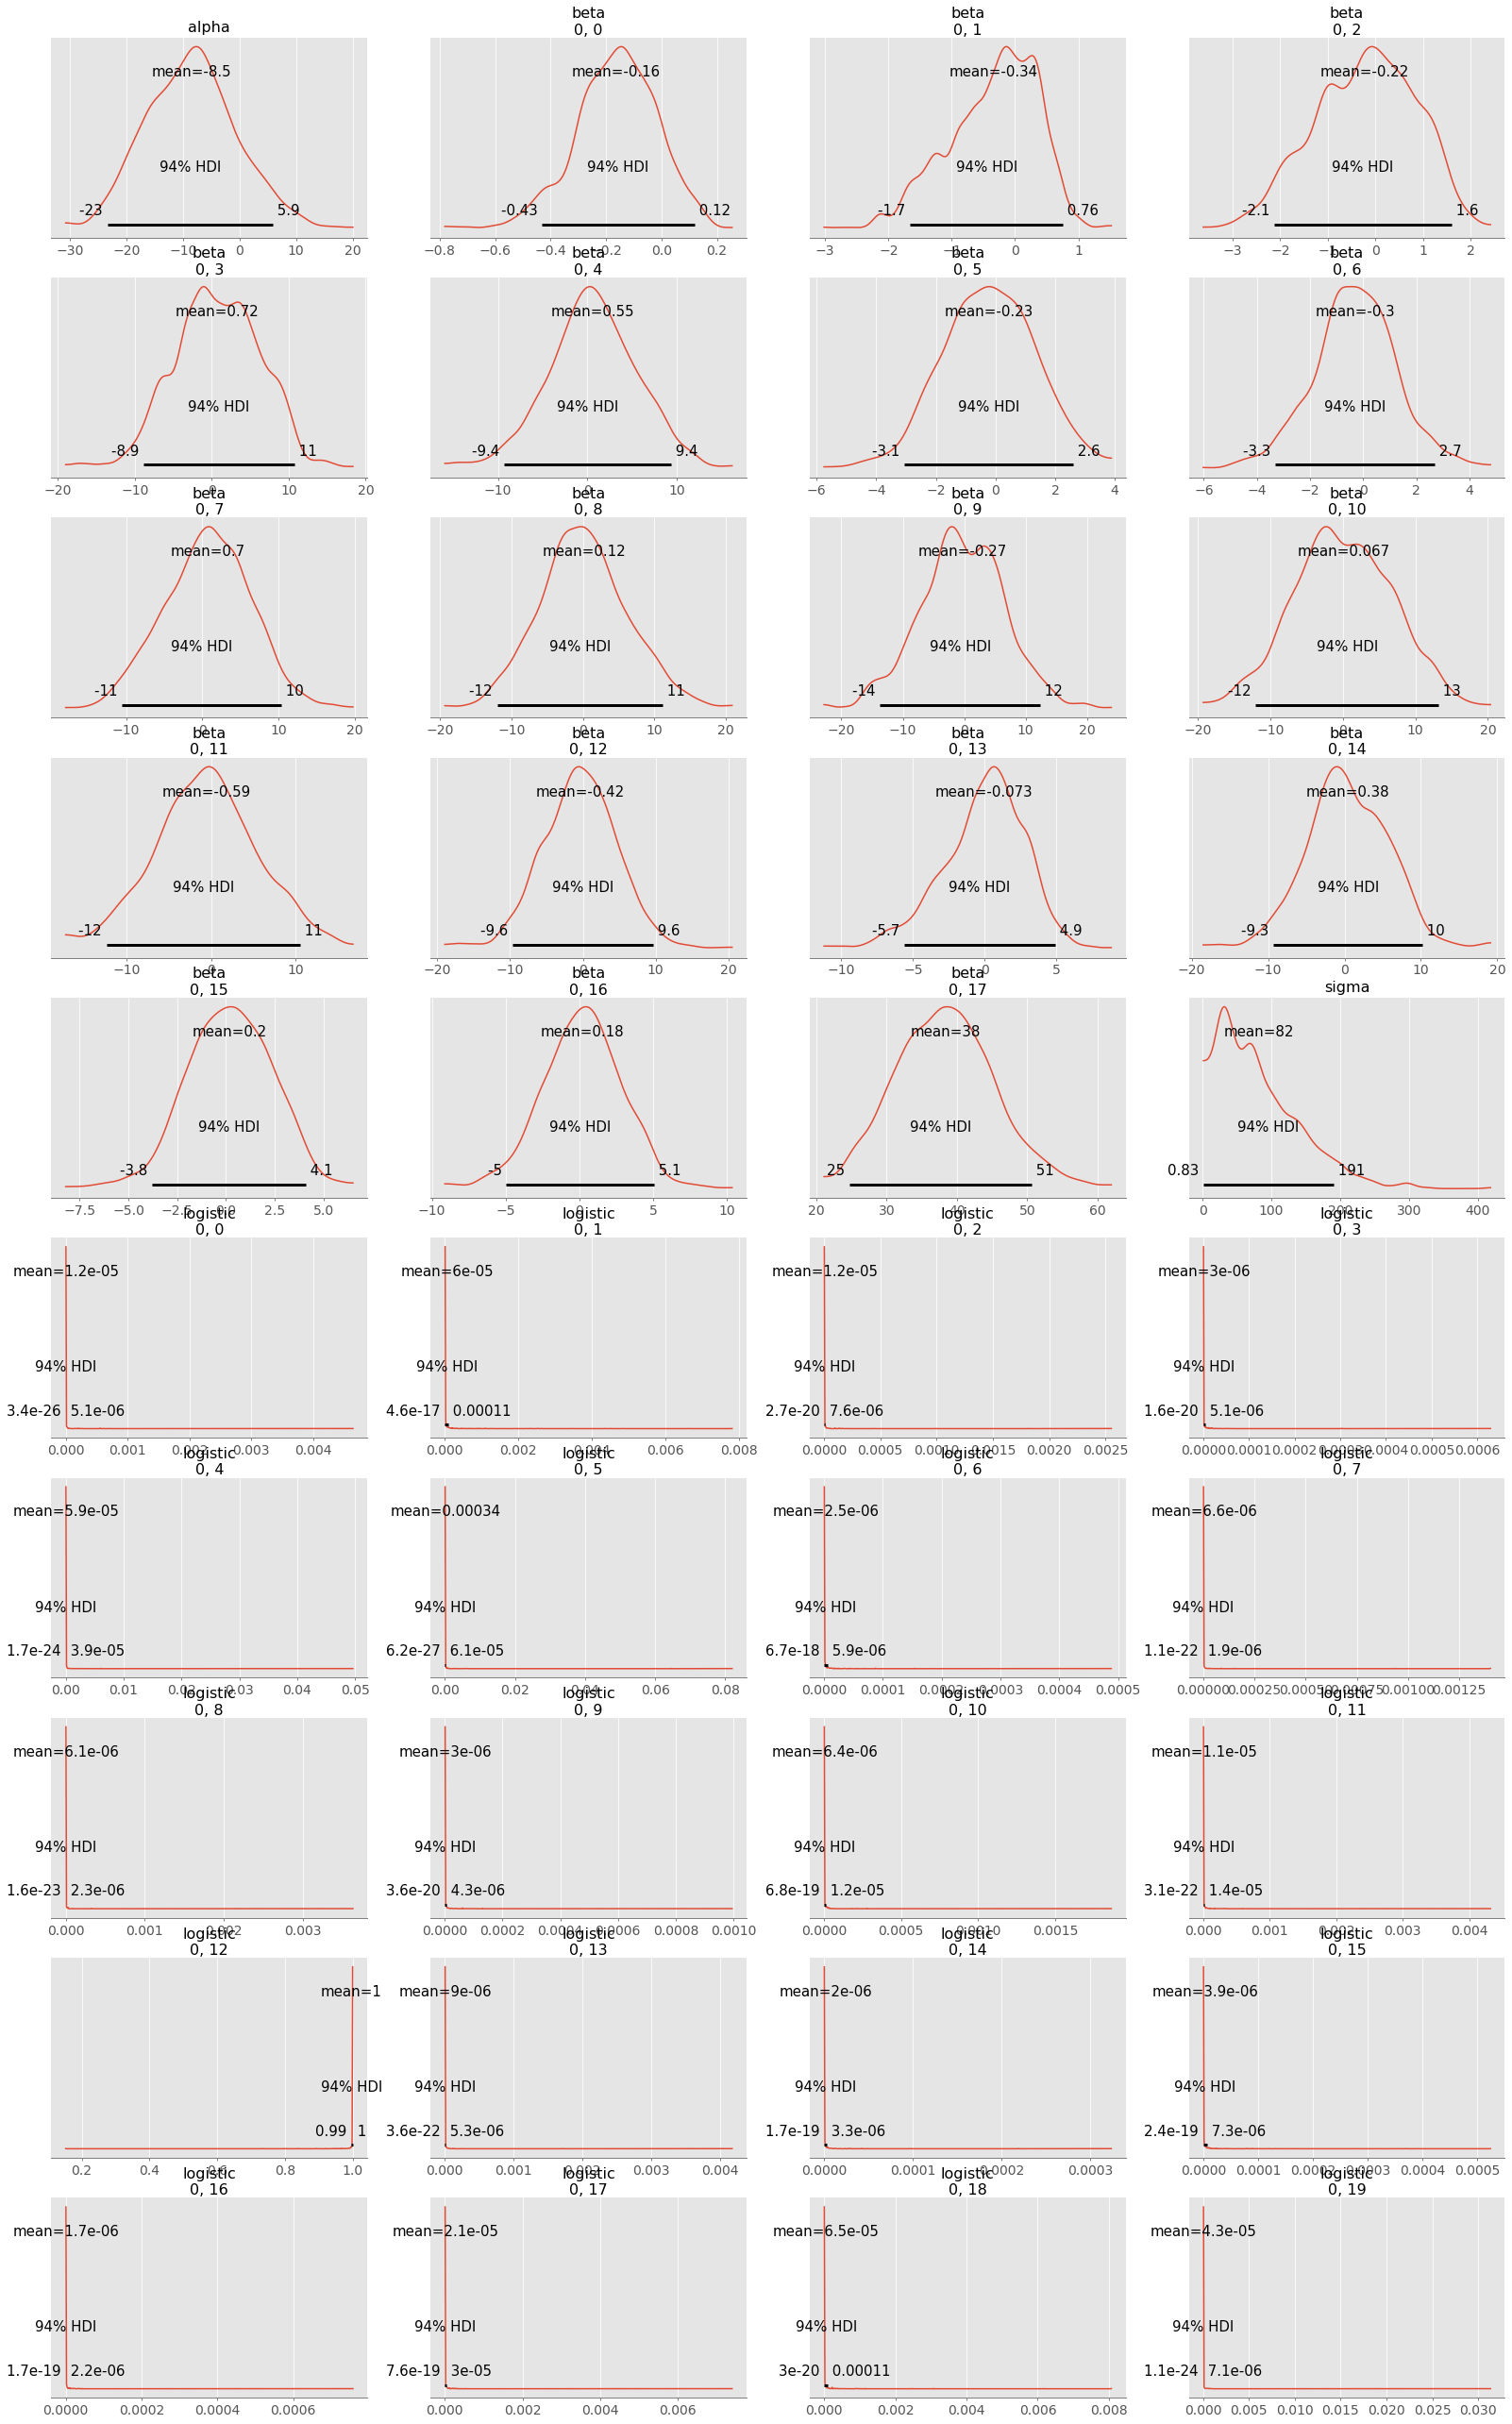

In [ ]:

#coords = {"observation": df0.index.values}
model = pm.Model()
with model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    betas = pm.Normal('beta', mu=0, sd=10, shape=(1,X_train.shape[1]))
    sigma = pm.HalfNormal('sigma', sd=100)
    #xdata = pm.Data("pred", X_train.T)
    #mu = alpha + pm.math.dot(betas , X_shared.T)
    mu = pm.math.dot(betas, X_shared.T) + alpha
    logistic = pm.Deterministic('logistic',pm.math.sigmoid(mu))
    #f = pm.math.dot(betas,X_shared.T)
    #p = pm.Deterministic('p', 1. / (1. + pm.math.exp(f + alpha))) 
    #p = pm.Deterministic("p", pm.math.invlogit(mu))
    # likelihood
    y = pm.Bernoulli("y",p=logistic, observed=Y_shared)
    #likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=Y_shared)
    step = pm.NUTS(target_accept = 0.95)
    trace = pm.sample(1000,init='ADVI+adapt_diag',return_inferencedata=True, tune = 2000)

    arviz.plot_trace(trace)
    arviz.plot_posterior(trace)
    print(pm.summary(trace))
# Update X values and predict outcomes and probabilities
#with bglm:
 #   pm.set_data({"pred": X_test.T})
  #  posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["y"], samples=600)
  #  model_preds = posterior_predictive["y"]

#dic = pm.sampling.fast_sample_posterior_predictive(trace, var_names = ('a','b','y'), model= model)
#pred_mean = dic['y'].mean()
#with pm.Model() as model:
 #   coeff = pm.Normal('x', mu=0, sd=1)
  #  logistic = pm.math.sigmoid(coeff * x_shared)
  #  pm.Bernoulli('obs', p=logistic, observed=y_shared)
  #  trace = pm.sample()

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


ROC is : 1.0


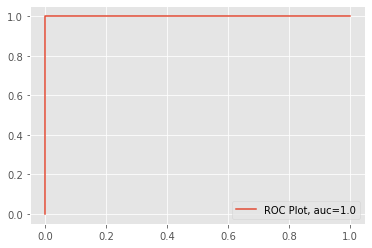

In [ ]:

X_shared.set_value(X_test)
Y_shared.set_value(Y_test) # dummy values

with model:
    post_pred = pm.sample_posterior_predictive(trace, samples=X_test.shape[0])

y_pred = post_pred['y'][-1].ravel().tolist()
print("ROC is :",roc_auc_score(Y_test,y_pred))
fpr, tpr, _ = roc_curve(Y_test, y_pred )
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
Y_test.values.tolist()

# GLM (With Chi-2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 38400
Interrupted at 38,399 [19%]: Average Loss = 1,687.2
Sequential sampling (2 chains in 1 job)
NUTS: [post_operative_stroke, dialysis_newly_required, atrial_fibrillation, inotropics_used, ventricular_arrythmia, cardiac_arrest, heart_failure, Miscellaneous_complications, multi_system_failure, gastro_intestinal_complication, pleural_effusion, pneumonia, prolonged_ventilation, post_op_creatinine, Reopened_postCABG, hospital_complications, drainage_at_24_hours, readmitted, additional_hours_ventilated, reintubated_hospital_stay, platelet_units, cryoprecipitate_units, fresh_frozen_plasma_units, red_blood_cell_units, additional_icu_hours, readmission_to_icu, initial_icu_stay, initial_hours_ventilated, DirectVision, no_of_ima_distal, IMAs, noda_arterial_conduits, platelet_units_A, fresh_frozen_plasma_units_A, red_blood_cell_units_A, IABP_indication, IABP, cannulation_method_other, CABG_status, Mitral_regurgitation, inotropes, anti_coagulants, nitratesIV, ventilator_u

Sampling 2 chains for 3_000 tune and 5_000 draw iterations (6_000 + 10_000 draws total) took 3115 seconds.
There were 4444 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8821 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/arviz/plots/traceplot.py:210: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (59), generating only 20 plots
  UserWarning,


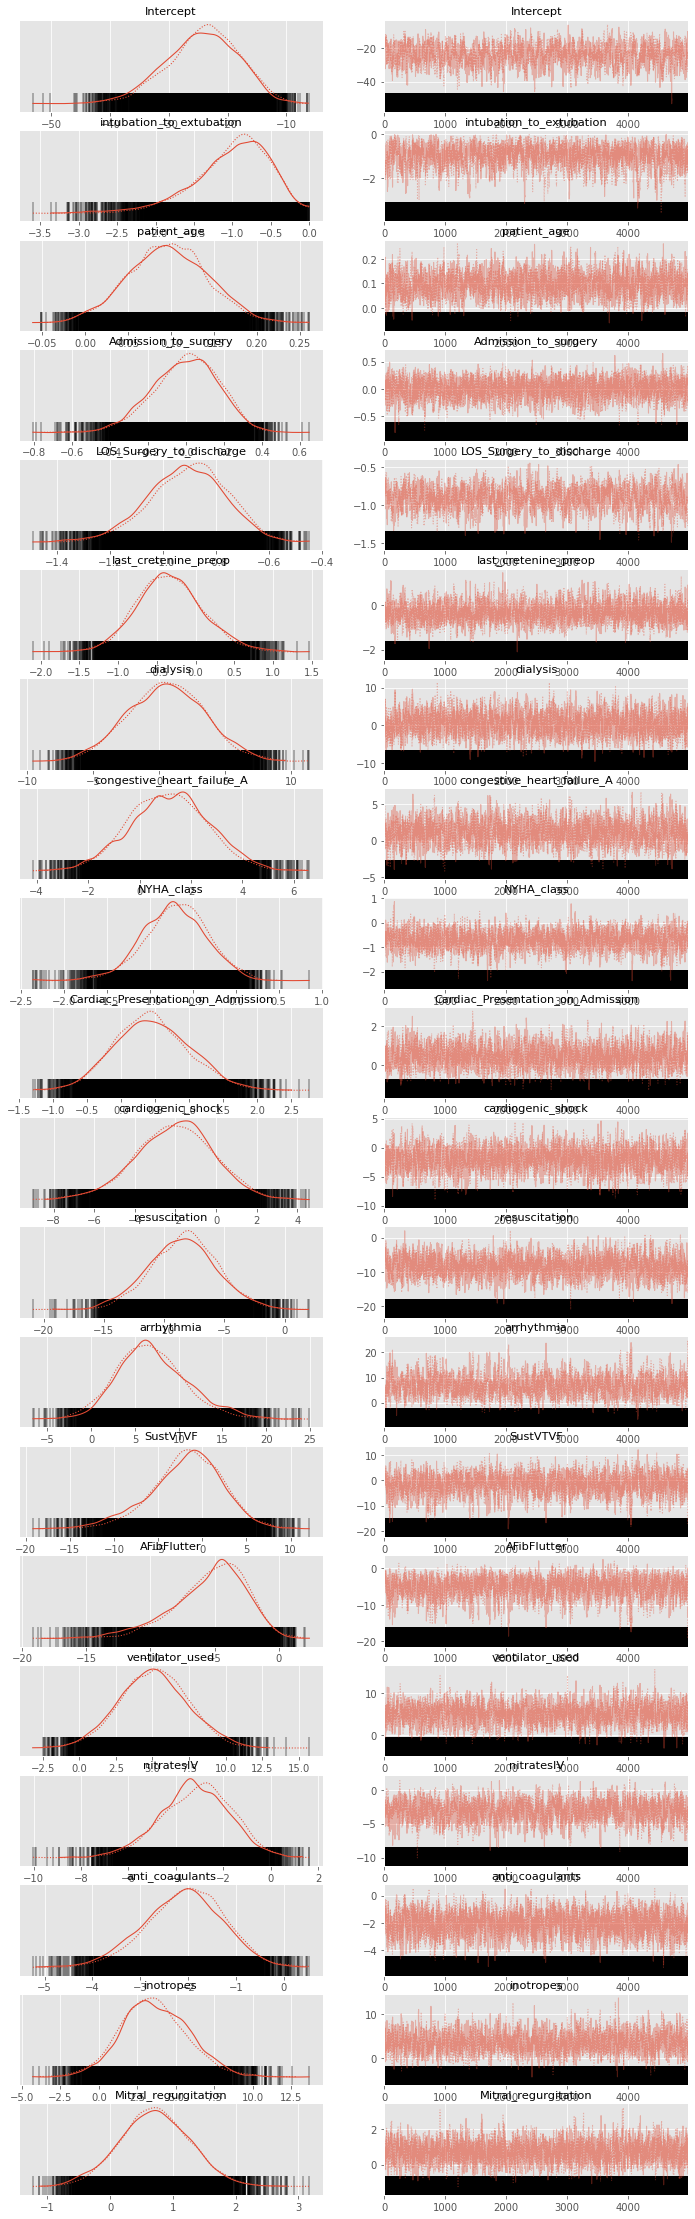

In [ ]:
def formula_from_cols(df, y):
    return y + ' ~ ' + ' + '.join([col for col in df.columns if not col==y])

data_Y, data_X = patsy.dmatrices(formula_like=formula_from_cols(new_data,'in_hospital_mortality'), data=new_data)
data_Y = np.asarray(data_Y).flatten()
labels = data_X.design_info.column_names
data_X = np.asarray(data_X)

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

with pm.Model() as glm_model:
    # Set data container.
    data = pm.Data("data", X_train)
    # Define GLM family.
    family = pm.glm.families.Binomial()
    # Set priors.
    priors = {
        "Intercept": pm.Normal.dist(mu=0, sd=10),
        "beta": pm.Normal.dist(mu=0, sd=10, shape = X_train.shape[1]),
        #"x2": pm.Normal.dist(mu=0, sd=10),
        #"x1:x2": pm.Normal.dist(mu=0, sd=10),
    }
    # Specify model.
    pm.glm.GLM(y=Y_train, x=data, family=family, intercept=False, labels=labels)
    # Configure sampler.
    trace = pm.sample(5000, chains=2, tune=3000, target_accept=0.95, init = 'advi+adapt_diag')
    arviz.plot_trace(data=trace)
    arviz.summary(trace)


/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


ROC is : 0.8794536049143227


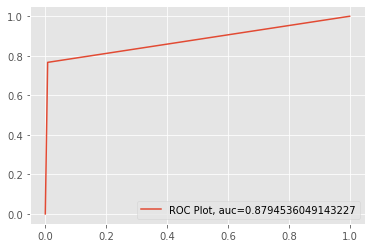

In [ ]:
# Compute the point prediction by taking the mean
# and defining the category via a threshold.

# Update data reference.
pm.set_data({"data": X_test}, model=glm_model)
# Generate posterior samples.
ppc_test = pm.sample_posterior_predictive(trace, model=glm_model, samples=X_test.shape[0])
p_test_pred = ppc_test["y"].mean(axis=0)
y_pred = (p_test_pred >= 0.5).astype("int")
print("ROC is :",roc_auc_score(Y_test,y_pred))
fpr, tpr, _ = roc_curve(Y_test, y_pred )
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Correlation Feature Selection

In [ ]:
# Correlation Matrix
dataframe = new_data
corrMatrix = dataframe.corr() # Finding correlation between the features of the dataset
corr_Df = pd.DataFrame(corrMatrix) # Correlation dataframe
#corr_Df = corr_Df.drop('p_id', 1)

print("\n\nCorrelation Matrix\n\n", corr_Df)

# Correlated Variable Pair
lis = []
for i in range(len(corr_Df.columns)):
  condition = corr_Df.iloc[:,i] > 0.65
  val = corr_Df.index[condition]
  if len(val) > 0:
    lis.append(val)

print("\n\nCorrelated Variable Pair\n\n", lis)

var_list = []

for i in range(len(lis)):
  var_names = lis[i][0] 
  print(var_names)
  if var_names not in var_list:
    var_list.append(var_names)

len(var_list)

print("\n\nFiltered down features to be used for model: \n\n", var_list)

new_new_data = df0[var_list]
new_new_data['in_hospital_mortality'] = df0['in_hospital_mortality']
data_X = new_new_data.iloc[:,0:len(new_new_data.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  new_new_data.iloc[:,len(new_new_data.columns)-1] # target variable only
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)


#scaler = StandardScaler() # scaling
# Fit on training set only.
#scaler.fit(X_train)
# Apply transform to both the training set and the test set.
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test) 

X_shared = shared(X_train.values)
Y_shared = shared(Y_train.values)



Correlation Matrix

                                    intubation_to_extubation  ...  in_hospital_mortality
intubation_to_extubation                           1.000000  ...               0.001874
patient_age                                       -0.000210  ...               0.087940
Admission_to_surgery                              -0.002113  ...               0.054335
LOS_Surgery_to_discharge                           0.022423  ...               0.113636
last_cretenine_preop                               0.001172  ...               0.105999
dialysis                                          -0.000148  ...               0.100675
congestive_heart_failure_A                        -0.001096  ...               0.112722
NYHA_class                                        -0.013470  ...               0.051653
Cardiac_Presentation_on_Admission                  0.012725  ...               0.084274
cardiogenic_shock                                  0.006611  ...               0.268139
resuscita

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Bayesian Model (With Chi-2 & Correlation Feature Selection)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 37500
Interrupted at 37,499 [18%]: Average Loss = 21,503
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 473 seconds.
There were 189 divergences after tuning. Increase `target_accept` or reparameterize.
There were 214 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/arviz/plots/plot_utils.py:277: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (4294) in plot_posterior, generating only 40 plots
  UserWarning,


                     mean     sd  hdi_3%  ...  ess_bulk  ess_tail  r_hat
alpha             -11.654  3.069 -17.365  ...     588.0     733.0   1.00
beta[0, 0]         -0.918  0.332  -1.551  ...     405.0     615.0   1.01
beta[0, 1]          0.034  0.033  -0.030  ...     674.0    1024.0   1.00
beta[0, 2]          0.010  0.124  -0.228  ...     806.0     781.0   1.00
beta[0, 3]         -0.526  0.095  -0.684  ...     243.0     114.0   1.00
...                   ...    ...     ...  ...       ...       ...    ...
logistic[0, 4239]   0.000  0.000   0.000  ...     304.0     556.0   1.01
logistic[0, 4240]   0.962  0.078   0.844  ...    1086.0    1026.0   1.00
logistic[0, 4241]   0.000  0.000   0.000  ...     562.0     674.0   1.00
logistic[0, 4242]   0.000  0.000   0.000  ...     505.0     642.0   1.00
logistic[0, 4243]   0.000  0.000   0.000  ...     553.0     740.0   1.01

[4294 rows x 9 columns]


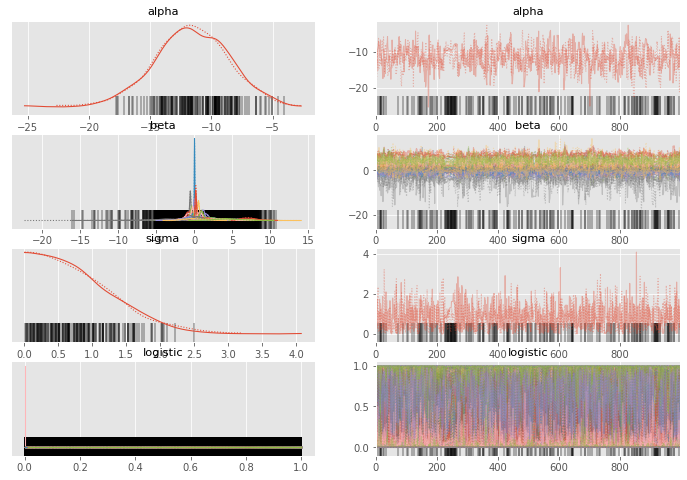

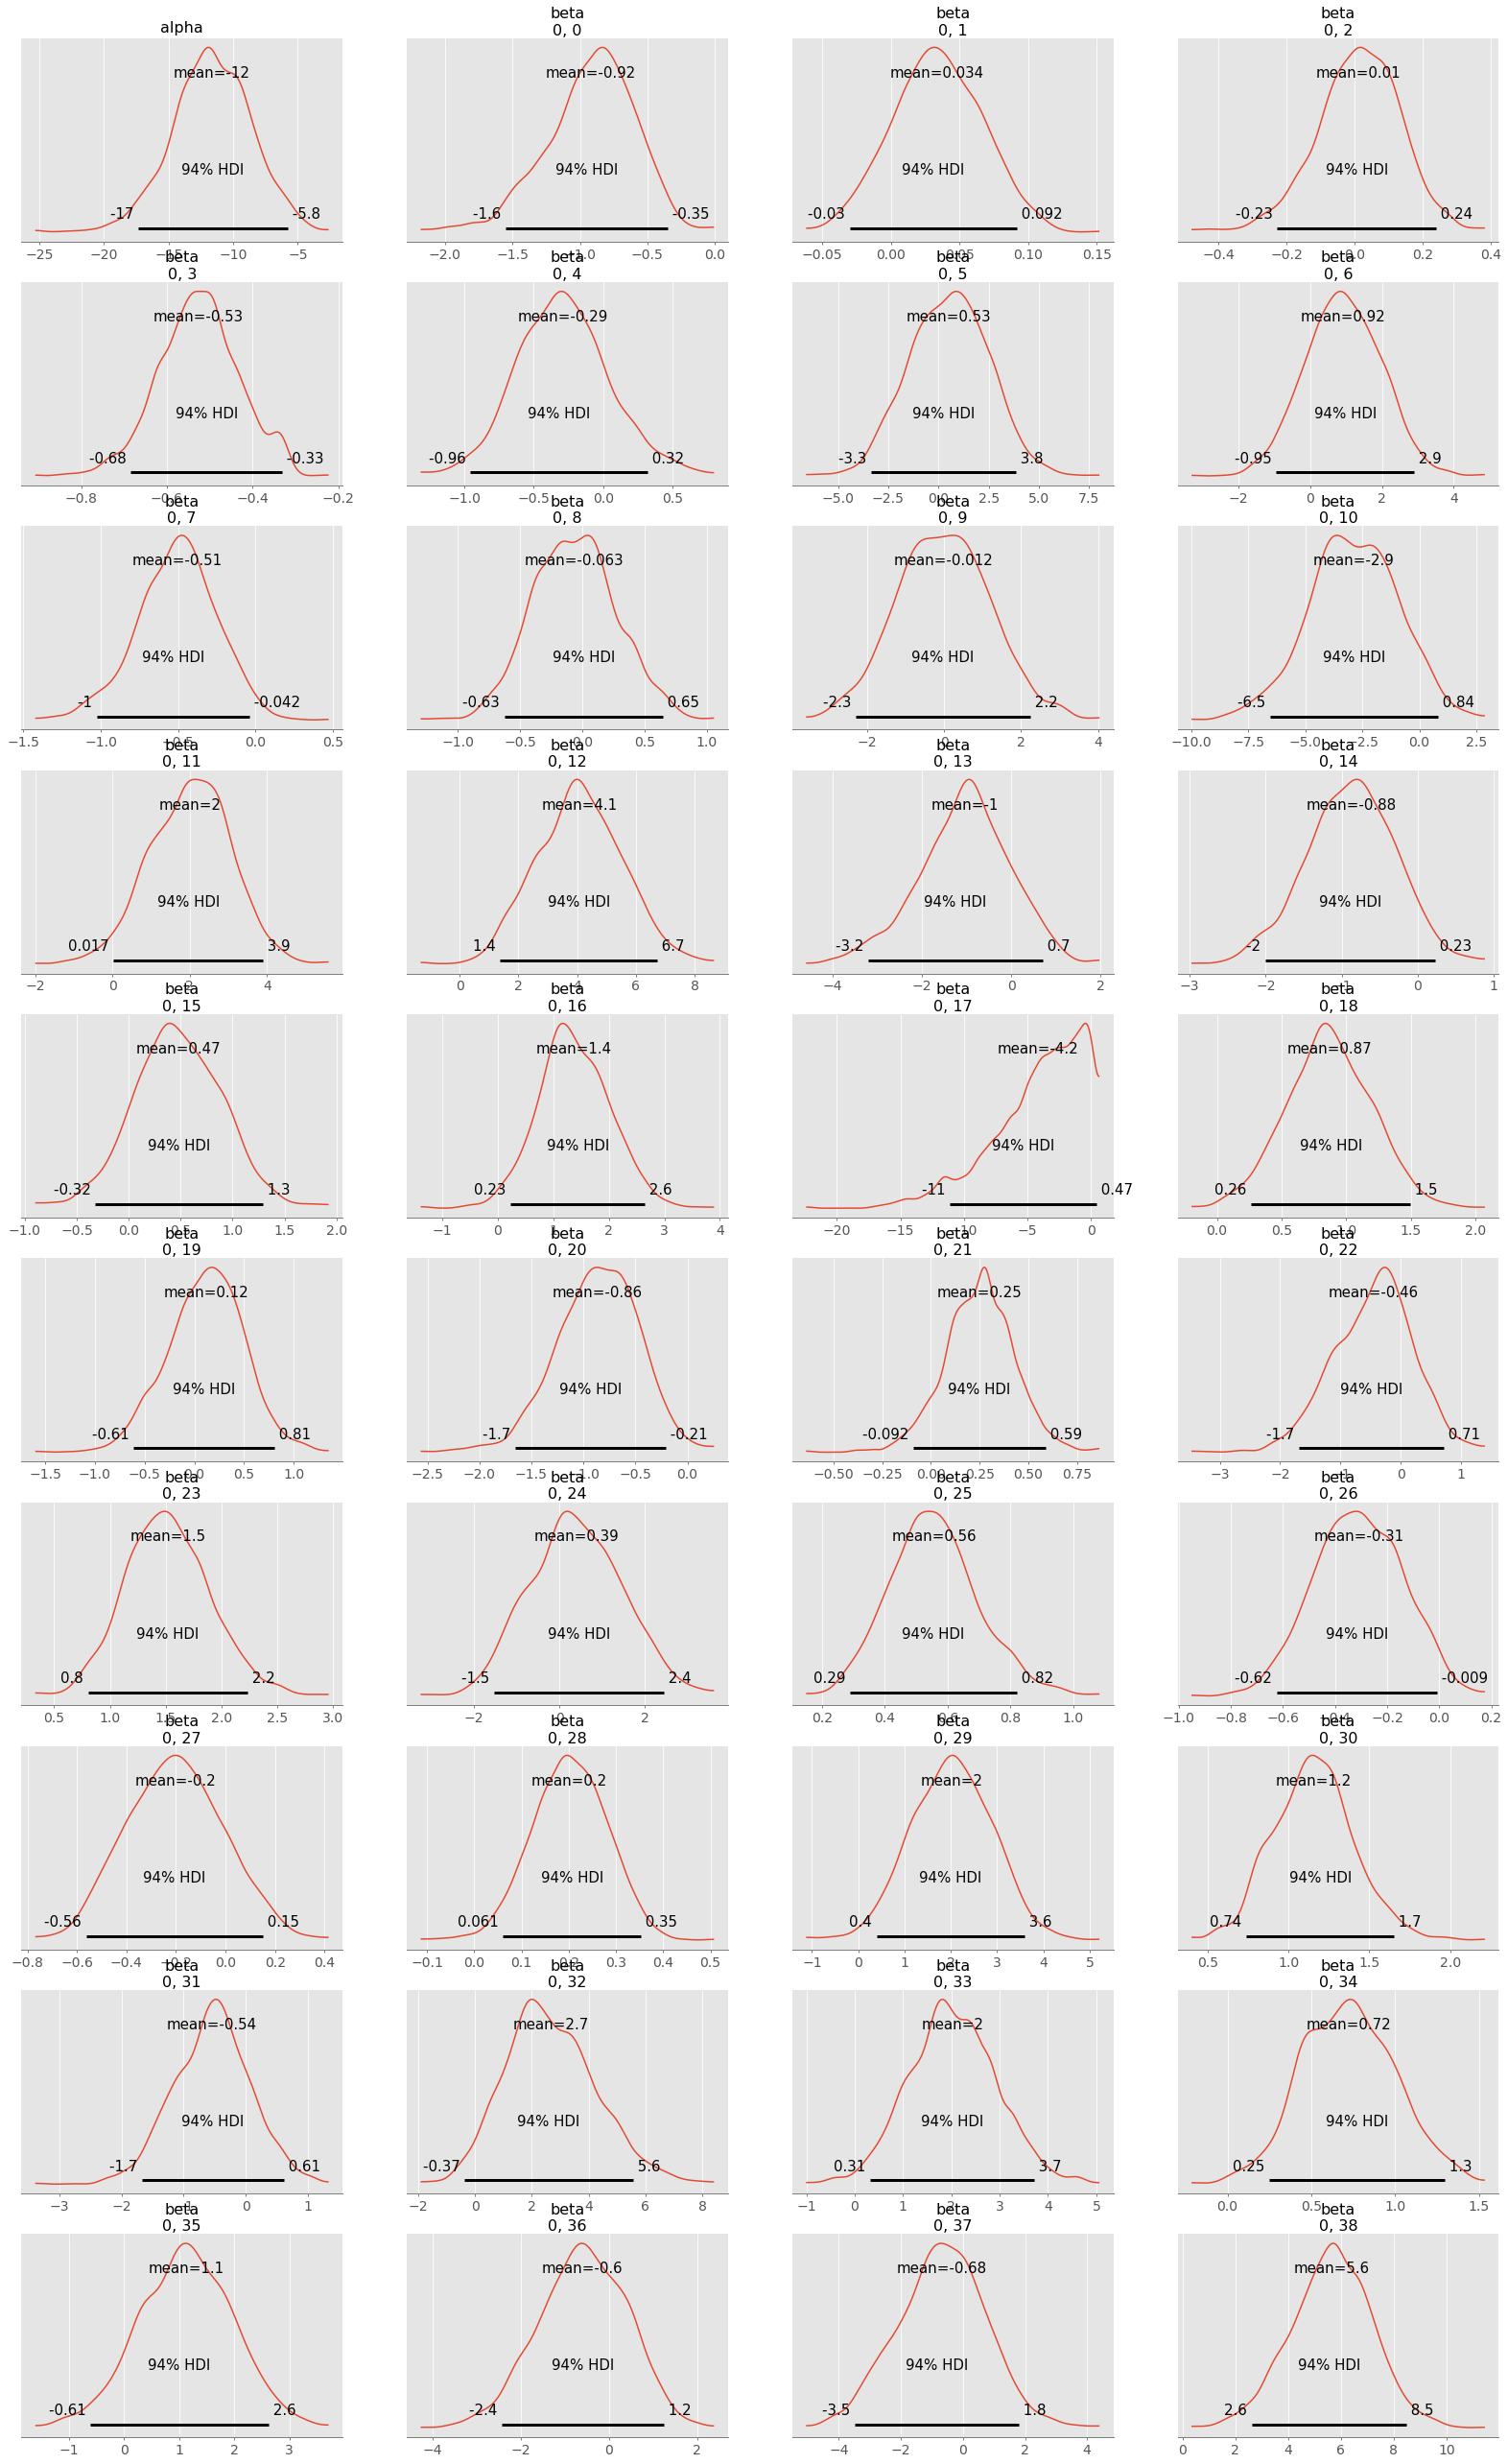

In [ ]:

#coords = {"observation": df0.index.values}
model = pm.Model()
with model:
    alpha = pm.Normal('alpha', mu=4, sd=10)
    betas = pm.Normal('beta', mu=1, sd=6, shape=(1,X_train.shape[1]))
    sigma = pm.HalfNormal('sigma', sd=1)
    #xdata = pm.Data("pred", X_train.T)
    #mu = alpha + pm.math.dot(betas , X_shared.T)
    mu = pm.math.dot(betas, X_shared.T) + alpha
    logistic = pm.Deterministic('logistic',pm.math.sigmoid(mu))
    #f = pm.math.dot(betas,X_shared.T)
    #p = pm.Deterministic('p', 1. / (1. + pm.math.exp(f + alpha))) 
    #p = pm.Deterministic("p", pm.math.invlogit(mu))
    # likelihood
    y = pm.Bernoulli("y",p=logistic, observed=Y_shared)
    #likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=Y_shared)
    step = pm.NUTS(target_accept = 0.95)
    trace = pm.sample(1000,init='ADVI+adapt_diag',return_inferencedata=True, tune = 2000)

    arviz.plot_trace(trace)
    arviz.plot_posterior(trace)
    print(pm.summary(trace))
# Update X values and predict outcomes and probabilities
#with bglm:
 #   pm.set_data({"pred": X_test.T})
  #  posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["y"], samples=600)
  #  model_preds = posterior_predictive["y"]

#dic = pm.sampling.fast_sample_posterior_predictive(trace, var_names = ('a','b','y'), model= model)
#pred_mean = dic['y'].mean()
#with pm.Model() as model:
 #   coeff = pm.Normal('x', mu=0, sd=1)
  #  logistic = pm.math.sigmoid(coeff * x_shared)
  #  pm.Bernoulli('obs', p=logistic, observed=y_shared)
  #  trace = pm.sample()

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


ROC is : 0.8775137407048174


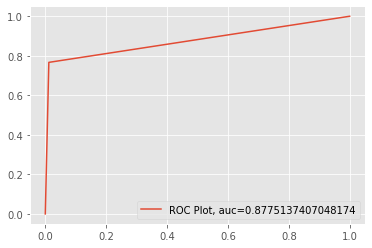

In [ ]:

X_shared.set_value(X_test)
Y_shared.set_value(Y_test) # dummy values

with model:
    post_pred = pm.sample_posterior_predictive(trace, samples=X_test.shape[0])

y_pred = post_pred['y'][-1].ravel().tolist()
print("ROC is :",roc_auc_score(Y_test,y_pred))
fpr, tpr, _ = roc_curve(Y_test, y_pred )
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# GLM (With Chi-2 & Correlation Feature Selection)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 37800
Interrupted at 37,799 [18%]: Average Loss = 1,674.2
Sequential sampling (2 chains in 1 job)
NUTS: [post_operative_stroke, dialysis_newly_required, atrial_fibrillation, inotropics_used, ventricular_arrythmia, cardiac_arrest, heart_failure, Miscellaneous_complications, multi_system_failure, gastro_intestinal_complication, pleural_effusion, pneumonia, prolonged_ventilation, post_op_creatinine, Reopened_postCABG, hospital_complications, drainage_at_24_hours, additional_hours_ventilated, reintubated_hospital_stay, cryoprecipitate_units, fresh_frozen_plasma_units, red_blood_cell_units, additional_icu_hours, readmission_to_icu, initial_hours_ventilated, noda_arterial_conduits, platelet_units_A, fresh_frozen_plasma_units_A, red_blood_cell_units_A, IABP, cannulation_method_other, CABG_status, Mitral_regurgitation, anti_coagulants, nitratesIV, ventilator_used, arrhythmia, resuscitation, cardiogenic_shock, Cardiac_Presentation_on_Admission, NYHA_class, congestive_hea

Sampling 2 chains for 3_000 tune and 5_000 draw iterations (6_000 + 10_000 draws total) took 2220 seconds.
There were 4498 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9329 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/arviz/plots/traceplot.py:210: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (49), generating only 20 plots
  UserWarning,


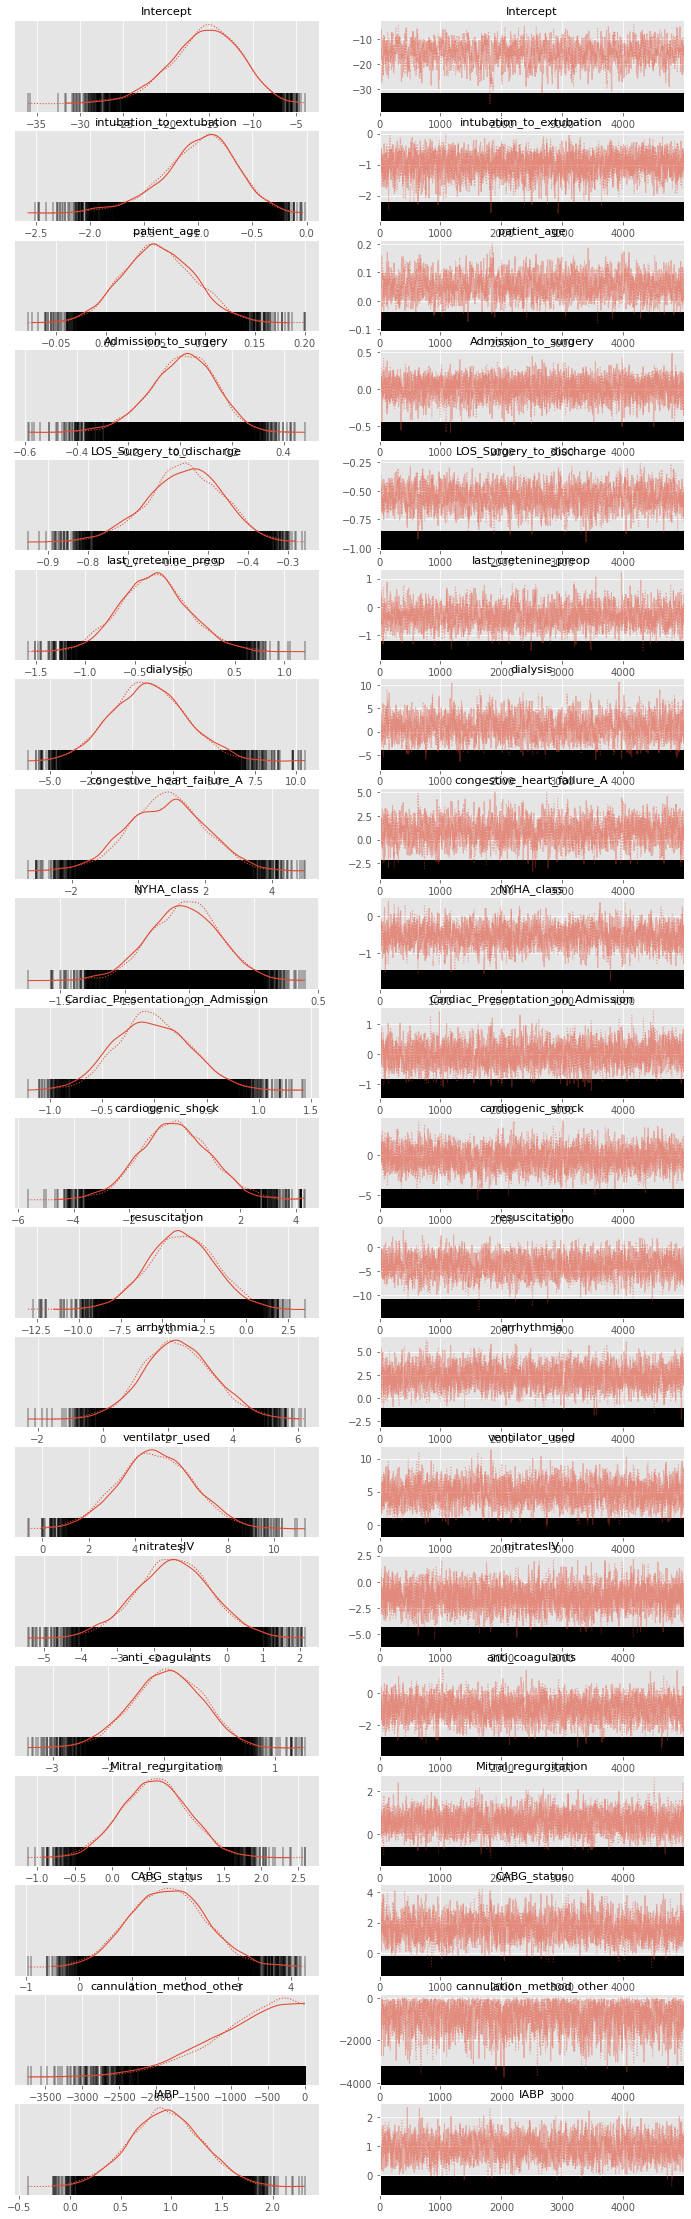

In [ ]:
def formula_from_cols(df, y):
    return y + ' ~ ' + ' + '.join([col for col in df.columns if not col==y])

data_Y, data_X = patsy.dmatrices(formula_like=formula_from_cols(new_new_data,'in_hospital_mortality'), data=new_new_data)
data_Y = np.asarray(data_Y).flatten()
labels = data_X.design_info.column_names
data_X = np.asarray(data_X)

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

with pm.Model() as glm_model:
    # Set data container.
    data = pm.Data("data", X_train)
    # Define GLM family.
    family = pm.glm.families.Binomial()
    # Set priors.
    priors = {
        "Intercept": pm.Normal.dist(mu=0, sd=10),
        "beta": pm.Normal.dist(mu=0, sd=10, shape = X_train.shape[1]),
        #"x2": pm.Normal.dist(mu=0, sd=10),
        #"x1:x2": pm.Normal.dist(mu=0, sd=10),
    }
    # Specify model.
    pm.glm.GLM(y=Y_train, x=data, family=family, intercept=False, labels=labels)
    # Configure sampler.
    trace = pm.sample(5000, chains=2, tune=3000, target_accept=0.95, init = 'advi+adapt_diag')
    arviz.plot_trace(data=trace)
    arviz.summary(trace)


ROC is : 0.8794536049143227


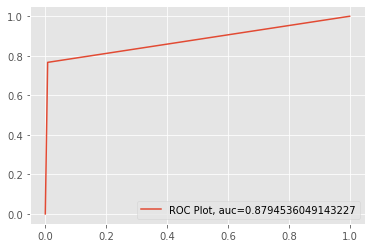

In [ ]:
# Compute the point prediction by taking the mean
# and defining the category via a threshold.
p_test_pred = ppc_test["y"].mean(axis=0)
y_pred = (p_test_pred >= 0.5).astype("int")
print("ROC is :",roc_auc_score(Y_test,y_pred))
fpr, tpr, _ = roc_curve(Y_test, y_pred )
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()